# Least Squares

We learned in the previous chapter that for a given $A\in\maR^{m\times n}$, the
equation $Ax=b$ need not possess a
solution when the number of rows of $A$ exceeds its rank, i.e.,
when $r<m$. We detail two natural engineering contexts, 
where material parameters
are to be inferred from experiment, in which the governing $A$ matrix has $r<m$,
and offer probabilistic and statistical interpretations.
To resolve the inconsistent system $Ax=b$ we project the
faulty $b$ into the column space of $A$ and proceed to solve the consistent,
so-called normal equations, $A^TAx=A^Tb$. We then develop the associated theory
of projection matrices and show how this permits us to transform linearly 
independent collections of vectors into orthonormal collections.

This theory has many, far reaching applications. Among these we have chosen
to focus on Orthogonal Polynomials, Wiener Filters, and Detecting Integer Relations.

## The Normal Equations

When faced with a matrix $A$ and vector $b\not\in\Ra(A)$, the goal is to 
choose $x$ such that $Ax$
is as close as possible to $b$. Measuring closeness in terms of the
sum of the squares of the components we arrive at the  **least squares** 
problem of minimizing

\begin{equation}
  \|Ax-b\|^2 \equiv (Ax-b)^T(Ax-b) \label{eq:res}
\end{equation}

over all $x\in\maR^n$. The path to the solution is illuminated by the
Fundamental Theorem. More precisely, we write

\begin{equation*}
  b = b_R + b_N \where b_R \in \Ra(A) \and b_N\in\N(A^T).
\end{equation*}

On noting that (i) $(Ax-b_R)\in\Ra(A)$ for every $x\in\maR^n$ and
(ii) $\Ra(A)\perp\N(A^T)$ we arrive at the Pythagorean Theorem

\begin{equation}
  \|Ax-b\|^2 = \|Ax-b_R-b_N\|^2 = \|Ax-b_R\|^2 + \|b_N\|^2, \label{eq:pyth}
\end{equation}

As $b_N$ is what it is, (\ref{eq:pyth}) states that
the best $x$ is the one that satisfies

\begin{equation}
  Ax = b_R. \label{eq:n1}
\end{equation}

As $b_R\in\Ra(A)$ this equation indeed possesses a solution.
We have yet however to specify how one computes $b_R$ given $b$.
Although an explicit expression for $b_R$, the so called **orthogonal projection** \index{projection}
of $b$ onto $\Ra(A)$, in terms of $A$ and $b$ is within our grasp we
shall, strictly speaking, not require it. To see this, let us note that
if $x$ satisfies (\ref{eq:n1}) then

\begin{equation}
  Ax-b = Ax-b_R-b_N = -b_N. \label{eq:n2}
\end{equation}

As $b_N$ is no more easily computed than $b_R$ you may claim that we
are just going in circles. The practical information in (\ref{eq:n2})
however is that $(Ax-b)\in\N(A^T)$, i.e., $A^T(Ax-b)=0$, i.e.,

\begin{equation}
  \boxed{A^TAx = A^Tb.} \label{eq:n3}
\end{equation}

As $A^Tb\in\Ra(A^T)$ regardless of $b$ this system, often referred to as
the  **normal equations** , indeed has a solution.
This solution is unique so long as the columns of $A^TA$ are linearly
independent, i.e., so long as $\N(A^TA)=\{0\}$. Recalling 
Exer.~\secref{null}.\ref{nc3}, we note that this is equivalent to $\N(A)=\{0\}$. We summarize our
findings in

\begin{proposition}\label{prop:lsq1} Suppose that $A\in\maR^{m\times n}$. The set 
of $x\in\maR^n$ for which the misfit
$\|Ax-b\|^2$ is smallest is composed of those $x$ for which

\begin{equation*}
  A^TAx = A^Tb.
\end{equation*}

There is always at least one such $x$.  There is exactly one such $x$
if and only if $\N(A)=\{0\}$.
\end{proposition}

As a concrete example, we take

\begin{equation}
  A = \begin{bmatrix}1 & 1 \cr 0 & 1 \cr 0 & 0 \end{bmatrix} \and
  b = \begin{bmatrix}1 \cr 1 \cr 1 \end{bmatrix}.  \label{eq:smallsq}
\end{equation}

and plot $\Ra(A)$ and the associated decomposition of 
$b$ in Fig. \ref{example:lsqfig}.

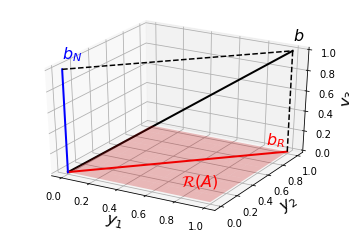

In [1]:
# illustrate that b = b_R + b_N
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection="3d")

y1 = np.linspace(0,1,10)
Y1, Y2 = np.meshgrid(y1,y1)
Y3 = np.zeros(Y1.shape)
ax.plot_surface(Y1,Y2,Y3,color = 'r',alpha = 0.25)

ax.plot3D([0, 1],[0, 1],[0, 1],'k',linewidth=2)
ax.plot3D([0, 1],[0, 1],[0.001, 0.001],'r',linewidth=2)
ax.plot3D([0, 0],[0, 0],[0, 1],'b',linewidth=2)
ax.plot3D([0, 1],[0, 1],[1, 1],'k--')
ax.plot3D([1, 1],[1, 1],[0, 1],'k--')

ax.text3D(0,0,1.1,'$b_N$',fontsize=16, color='b')
ax.text3D(1,1,1.1,'$b$',fontsize=16)
ax.text3D(0.9,0.9,0.1,'$b_R$',fontsize=16, color = 'r')
ax.text3D(0.8,0,0.1,'${\cal R}(A)$',fontsize=16, color = 'r')
ax.set_xlabel('$y_1$',fontsize=16)
ax.set_ylabel('$y_2$',fontsize=16)
ax.set_zlabel('$y_3$',fontsize=16);

\begin{myfig} \label{example:lsqfig} Decomposition of $b=b_R+b_N$
into its column space and left null space components. \end{myfig}

As this $b\ne R(A)$ there is no $x$ such that $Ax=b$. Indeed,

\begin{equation*}
  \|Ax-b\|^2 = (x_0+x_1-1)^2+(x_1-1)^2+1 \ge 1
\end{equation*}

with the minimum uniquely attained at

\begin{equation*}
  x = \begin{bmatrix} 0 \\ 1 \end{bmatrix}
\end{equation*}

in agreement with the unique solution of (\ref{eq:n3}), for

\begin{equation*}
  A^TA = \begin{bmatrix}1 & 1 \cr 1 & 2 \end{bmatrix} \hskip 0.25in A^Tb = \begin{bmatrix}1 \cr 2\end{bmatrix}.
\end{equation*}

We now recognize,  *a posteriori* , that

\begin{equation*}
  b_R = Ax = \begin{bmatrix}1 \cr 1 \cr 0 \end{bmatrix}
\end{equation*}

is the orthogonal projection of $b$ onto the column space of $A$.

We consider a more typical example, attempting to determine the neuronal
membrane conductance, $G$, and reversal potential, $E$, by 
fitting Ohm's law for the putative neuronal membrane current,

\begin{equation}
  b = G(v-E), \label{eq:OhmM}
\end{equation}

where we have $m$ current measurements, $b_j$, at $m$ prescribed voltage levels, $v_j$. 
The key step is to recognize (\ref{eq:OhmM})
as an $m$-by-$2$ system of equations for the unknown biophysical parameters
$x_1=G$ and $x_2=GE$, via

\begin{equation*}
  v_jx_1 - x_2 = b_j, \hskip 0.25in j=1,\ldots,m
\end{equation*}

and to translate this into the least squares problem $Ax=b$ where 

\begin{equation*}
  A = \begin{bmatrix} v_1 & -1 \\
                      v_2 & -1 \\
                      \vdots & \vdots \\
                      v_m & -1 \end{bmatrix}.
\end{equation*}

We illustrate this in Fig. \ref{example:ohmfit} on noisy synthetic data generated
by the "true values", $G=1.2\,mS$ and $E=-70\,mV$. We suppose we have 21
accurate voltage measurements, between $-75\,mV$ and $-65\,mV$ in steps of
$0.5\,mV$. We then generate the 21 true values of $b$ via (\ref{eq:OhmM}) and
then soil these with  *randn*   noise.

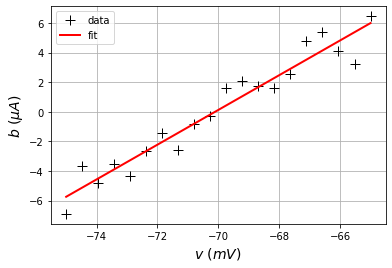

In [2]:
# Setup and solve the Least Squares Problem of 
# determining the membrane conductance, G, and reversal
# potential, E, from multiple measurements of the current, b
%matplotlib inline

N = 20
v = np.linspace(-75,-65,N) # mV
Etrue = -70 # mV
Gtrue = 1.2  # mS
btrue = Gtrue*(v-Etrue)
vdat = v
sigma = 1
eps = sigma*np.random.randn(N,)   # gaussian noise, mean 0, variance sigma
bdat = btrue + eps
plt.plot(vdat,bdat,'k+',markersize=10)

A = -np.ones((N,2))
A[:,0] = v
x = np.linalg.lstsq(A, bdat, rcond=None)[0]

Grec = x[0]
Erec = x[1]/Grec

brec = Grec*(v-Erec)
plt.plot(vdat,brec,'r',linewidth=2)
plt.grid('on')
plt.xlabel('$v\  (mV)$',fontsize=14)
plt.ylabel('$b\  (\mu A)$',fontsize=14)
plt.legend(['data','fit']);

\begin{myfig} \label{example:ohmfit}. The  *x*   points are the
synthetic noisy measurements. On solving the associated least squares problem,
$A^TAx=A^Tb$ we "recover" $G=1.18$ and $E=-68.75$, which when used in
(\ref{eq:OhmM}), yields the solid straight line. \end{myfig}

\begin{exercise} \label{ex:ohmfitE} With regard to the python cell above, explore the error in fit as a function of error in measurement. In particular, graph the residual $\|Ax-b\|$ as a function of $\sigma$ as $\sigma$ moves from say 0 to 2.
\end{exercise}

\begin{exercise}\label{ex:lsq1} An elastic cable was stretched to lengths $\ell=6,\ 7,$
and 8 feet under applied forces of $f=1,\ 2,$ and 4 tons. Assuming Hooke's
law $\ell-L=cf$, find the cable's compliance, $c$, and original length, $L$, by
least squares. In particular

(i) Formulate the question as $Ax=b$, with numerical values in $A$ and $b$.
What does $x$ signify?

(ii) Solve the normal equations, $A^TAx=A^Tb$ by hand for $x$.

(iii) Graph the three data points in the $(f,\ell)$ plane as well as the
straight line fit corresponding to the $x$ found in (ii).
\end{exercise}

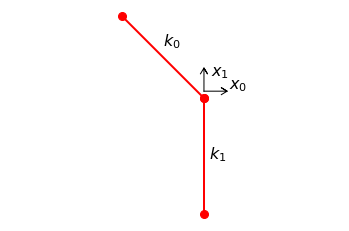

In [3]:
# draw the knee network
%matplotlib inline

ax = np.array([0, 1, .75, 1, .75])
ay = np.array([0, 0, .15, 0, -.15])

plt.figure()
plt.plot([0, 0],[0, 5],'r.-',linewidth=2,markersize=16)
plt.text(.2,2.4,'$k_1$',fontsize=16)

s = np.sqrt(25/2)
plt.plot([0, -s],[5, 5+s],'r.-',linewidth=2,markersize=16)
plt.text(-s/2,5.5+s/2,'$k_0$',fontsize=16)

plt.plot(ax,ay+5.3,'k',linewidth=1) 
plt.plot(ay,ax+5.3,'k',linewidth=1)
plt.text(1.1,5.4,'$x_0$',fontsize=16)
plt.text(.3,6,'$x_1$',fontsize=16)
plt.axis('equal')
plt.axis('off');

\begin{myfig} \label{example:knee} A knee-joint with two degrees of freedom. The bottom and top nodes are fixed to foundations. As usual, the force vector at the free node has components $f_0$ and $f_1$ consistent with the ordering of $x$. \end{myfig}

\begin{exercise} \label{ex:knee} Consider the small knee-joint in Fig. \ref{example:knee}

(a) Write the equilibrium equations $A^TKAx=f$.

(b) Imagine the situation where we move the knee joint to a specified place, $x$, measure the resulting $f$, and use this information to estimate the two stiffesses, $k$. To that end show that $A^TKAx=f$ can be written as the following system for $k$
\begin{equation*}
  Bk = f, \where B = \begin{bmatrix} (x_0-x_1)/2 & 0 \\ (x_1 - x_0)/2 & x_1 \end{bmatrix}
\end{equation*}

(c) All though this system is invertible, so long as $x_0\ne x_1$, we don't have complete faith in the integrity of our force measurements, $f$. As such we make (at least) a second experiment where we move the knee
to a different place and measure a new pair of forces. If we label our displacent and force datum $x^{(0)}$, $x^{(1)}$, $f^{(0)}$ and $f^{(1)}$ we arrive at the four-by-two stacked system

\begin{equation}
  \begin{bmatrix} B^{(0)} \\ B^{(1)} \end{bmatrix} \begin{bmatrix} k_0 \\ k_1 \end{bmatrix} =
     \begin{bmatrix} f^{(0)} \\ f^{(1)} \end{bmatrix}  \label{eq:BstackEZ}
\end{equation}

where $B^{(m)}$ is the $B$ matrix corresponding to displacements $x^{(m)}$. Code and solve this least squares problem for reasonable choices of data and noise, applied to $f$. You may need ${\rm np.append}$ to help you stack.
\end{exercise}

## Application to a Biaxial Test Problem

We progress from identifying 2 electrical parameters from noisy voltage-current
measurements to identifying 20 fiber stiffness in \fig\figref{ex3} from 
noisy force-displacement measurements.

We envision loading the 9 nodes with a known force vectors, 
$f\in\maR^{18}$, and measuring the associated 18 displacements, $x$. 
From knowledge of $x$ and $f$ we wish to infer the twenty 
components of $K={\rm diag}(k)$ where $k$ is the vector of unknown 
fiber stiffnesses. The first, and most important, step is to recognize that 

\begin{equation*}
  A^TKAx = f
\end{equation*}

may be written as

\begin{equation}
  Bk = f \where B = A^T {\rm diag}(Ax). \label{eq:ls1}  
\end{equation}

Though conceptually simple this is not of great use in practice, for $B$ is
18-by-20 and hence (\ref{eq:ls1}) possesses many solutions. The way out (as in
our previous example) is to conduct more experiments. We will see that, for
our small sample, 2 experiments will suffice.

To be precise, we suppose that $x^{(1)}$ is the displacement produced by
loading $f^{(1)}$ while $x^{(2)}$ is the displacement produced by loading
$f^{(2)}$. We then piggyback the associated pieces in

\begin{equation*}
  B = \begin{bmatrix}A^T {\rm diag}(Ax^{(1)}) \cr A^T {\rm diag}(Ax^{(2)}) \end{bmatrix}   \and
  f = \begin{bmatrix}f^{(1)} \cr f^{(2)} \end{bmatrix}.
\end{equation*}

This $B$ is 36-by-20 and so the system $Bk=f$ is overdetermined and hence
ripe for least squares.

We proceed then to assemble $B$ and $f$. We suppose $f^{(1)}$ and $f^{(2)}$
to correspond to horizontal and vertical stretching

\begin{equation*}
  \eqalign{
  f^{(1)} &= [{-1}\ 0\ 0\ 0\ 1\ 0\ {-1}\ 0\ 0\ 0\ 1\ 0\ {-1}\ 0\ 0\ 0\ 1\ 0]^T \cr
  f^{(2)} &= [0\ 1\ 0\ 1\ 0\ 1\ 0\ 0\ 0\ 0\ 0\ 0\ 0\ {-1}\ 0\ {-1}\ 0\ {-1}]^T \cr}
\end{equation*}

respectively. For the purpose of our example we suppose that each $k_j=1$ 
except $k_8=5$. We assemble $A^TKA$ as in Chapter 3 and solve

\begin{equation*}
  A^TKAx^{(j)}=f^{(j)}
\end{equation*}

with the help of the pseudoinverse. In order to impart some *reality* to
this problem we taint each $x^{(j)}$ with 4 percent noise prior to
constructing $B$.  Regarding

\begin{equation*}
  B^TBk=B^Tf
\end{equation*}

We have illustrated the results of this procedure in Fig. \ref{example:lsqbiax}.

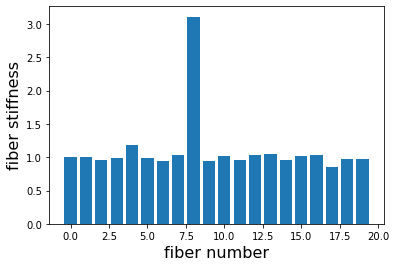

In [4]:
# lsqbiax.m
# recover the fiber stiffnesses from noisy measurements of their
# end displacements under horizontal & vertical loading
%matplotlib inline

pi = np.pi

data = np.array( [    #row of data for each fiber, the
[1, 	4,	-pi/2],		# first two columns are node numbers
[1,	5,	-pi/4],		# while the third is the fiber angle
[1,	2,	0],
[2,	4,	-3*pi/4],
[2,	5,	-pi/2],
[2,	6,	-pi/4],
[2,	3,	0],
[3,	5,	-3*pi/4],
[3,	6,	-pi/2],
[4,	7,	-pi/2],
[4,	8,	-pi/4],
[4,	5,	0],
[5,	7,	-3*pi/4],
[5,	8,	-pi/2],
[5,	9,	-pi/4],
[5,	6,	0],
[6,	8,	-3*pi/4],
[6,	9,	-pi/2],
[7,	8,	0],
[8,	9,	0]])

A = np.zeros((20,18))		# initialize the A matrix

for j in range(20):

    m = int(data[j,0]-1)
    n = int(data[j,1]-1)
    theta = data[j,2]

    A[j,2*n-1] = np.cos(theta)	# direct implementation of general formula
    A[j,2*m-1] = -np.cos(theta)
    A[j,2*n] = np.sin(theta)
    A[j,2*m] = -np.sin(theta)

K = np.eye(20)		# synthetic K matrix
K[8,8] = 5   # add a stiff fiber
 
S = A.T@K@A

f1 = np.array([-1, 0, 0, 0, 1, 0, -1, 0, 0, 0, 1, 0, -1, 0, 0, 0, 1, 0]) 	# horizontal load
f2 = np.array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, -1])		# vertical load

pS = np.linalg.pinv(S)

x1 = pS@f1       # displacement corresponding to f1
n1 = np.random.randn(x1.size)
x1n = x1*(1+n1/(max(abs(n1))*25))	# noisy x1

x2 = pS@f2     # displacement corresponding to f2
n2 = np.random.randn(x1.size)
x2n = x2*(1+n2/(max(abs(n2))*25)) 	# noisy x2

B = np.append(A.T@np.diag(A@x1n), A.T@np.diag(A@x2n), axis=0)
f = np.append(f1, f2, axis=0)

bestk = np.linalg.lstsq(B, f, rcond=None)[0]
kind = np.linspace(0,19,20)
plt.bar(kind, bestk)
plt.xlabel('fiber number',fontsize=16)
plt.ylabel('fiber stiffness',fontsize=16);

\begin{myfig} \label{example:lsqbiax}. Results of a successful biaxial test.
We see that even in the presence of noise that the stiff 
fiber is readily identified. \end{myfig}

\begin{exercise}\label{ex:lsq2} Note that, due to
the the random generation of the noise that taints the displacements,
one gets a different answer every time the code in the cell is invoked.

(i) Write a loop that invokes the code a 
sufficient number of times (until the averages settle down)
and construct bar plots of the average fiber stiffness and its standard
deviation for each fiber.

(ii) Experiment with various noise levels with the goal of
determining the level above which it becomes difficult to discern the
stiff fiber. Carefully explain your findings.
\end{exercise}

## Probabilistic and Statistical Interpretations

The electrical and mechanical least squares examples in the first two sections of this
chapter raised the possibility of measurement error. We show in this section that if the
errors are "normal'' then our least squares solution coincides with the solution of the more naturally
posed maximum likelihood problem and that in fact our least square projection is the best
linear unbiased estimator.
 
To say that the ouput of our $j$th experiment was tainted with Gaussian
(of mean $\mu$ and variance $\s^2$) measurement error is to say that

\begin{equation}
  a_jx = \hat b_j = b_j + \eps_j    \label{eq:abeps}
\end{equation}

where $a_j$ is the $j$th row of $A$, $\hat b_j$ is the ideal measurement, $b_j$ is the actual measurement, and $\eps_j$ is drawn from a 
probability distribution with density \index{probability density}

\begin{equation}
  p(\eps) \equiv \frac{1}{\s\sqrt{2\pi}}\exp(-(\eps-\mu)^2/(2\s^2)).
     \label{eq:pdf1}
\end{equation}

This bell curve is known as a Gaussian or Normal density.
Its associated distribution function \index{probability distribution}

\begin{equation}
  P(s) = \int_{-\infty}^s p(t)\,dt  \label{eq:Pdf1}
\end{equation}

reports the probability of observing a value no greater than $s$. We offer below a widget where you may view both $p$ and $P$ for mean $\mu=0$ over a range of variances.

<IPython.core.display.Javascript object>


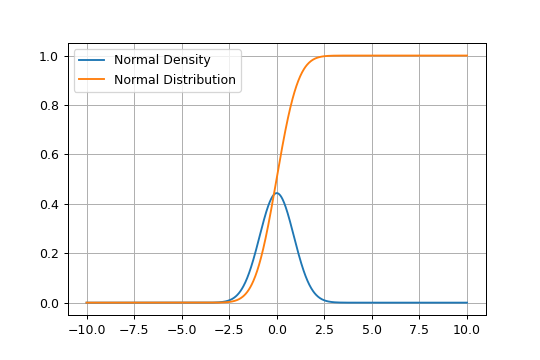

interactive(children=(FloatSlider(value=1.0, description='sigma', max=2.0, min=0.1), Output()), _dom_classes=(…

<function __main__.update(sigma=FloatSlider(value=1.0, description='sigma', max=2.0, min=0.1))>

In [43]:
# gaussian density and distribution widget
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *

t = np.linspace(-10,10,1000)
dt = t[1]-t[0]
sqp = np.sqrt(2*np.pi)
p = np.exp(-(t**2)/2)/sqp
fig = plt.figure()
pdat, = plt.plot(t,p)
P = np.cumsum(p)*dt
Pdat, = plt.plot(t,P)
plt.legend(['Normal Density','Normal Distribution'])
plt.grid('on')

def update( sigma=widgets.FloatSlider(min=0.1, max=2, step=0.1, value=1) ):
    p = np.exp(-(t**2)/(2*sigma**2))/(sigma*sqp)
    pdat.set_data(t, p)
    P = np.cumsum(p)*dt
    Pdat.set_data(t,P)
    fig.canvas.draw_idle()

interact(update)

\begin{myfig} \label{example:gaussian} The normal density and distribution functions of (\ref{eq:pdf1}) and (\ref{eq:Pdf1}). Please exercise the slider. \end{myfig}


We will confirm
in Exer.~\ref{ex:pdf1pf} that $P(\infty)=1$ and that the associated \index{mean} \index{variance} mean and variance obey

\begin{equation}
  \mean(p) \equiv \int_{-\infty}^\infty t p(t)\,dt = \mu \and
  \var(p) \equiv \int_{-\infty}^\infty (t-\mu)^2 p(t)\,dt = \s^2. \label{eq:normmvar}
\end{equation}

This permits us to write the probability of observing $\hat b_j$ given $a_j$
and the candidate $x$, as

\begin{equation*}
   p(\hat b_j|a_j;x) = \frac{1}{\s\sqrt{2\pi}}\exp(-(a_jx-b_j)^2/(2\s^2)).
\end{equation*}

Next, as we expect the $j$th and $k$th measurements to be independent of 
one another (i.e., errors in one should not effect errors in the other) 
we can write
the probability of observing $\hat b_j$ and $\hat b_k$ given $a_j$ and $a_k$
and the candidate $x$, as the product of the individual probabilities

\begin{equation*}
  p((\hat b_j,\hat b_k)|(a_j,a_k);x) = \frac{1}{\s^2 2\pi}
     \exp(-((a_jx-b_j)^2-(a_kx-b_k)^2)/(2\s^2)).
\end{equation*}

Combining now all $m$ experiments, we find

\begin{equation}
  p(\hat b|A;x) = \frac{1}{\s^m(2\pi)^{m/2}}\exp(-\|Ax-b\|^2/(2\s^2)).
   \label{eq:likeli}
\end{equation}

This expression is often interpreted as the likelihood of $A$
producing $\hat b$ given $x$.
The  **principle of maximum likelihood**  is to choose $x$
to maximize this likelihood. This is clearly the $x$ that minimizes
$\|Ax-b\|^2$. 

That is, when the output measurement error is Gaussian, and subsequent measurements are independent from one another, the maximum likelihood solution is the
least squares solution. \index{principle of maximum likelihood}


This rationale generalizes naturally to the case where each experiment
produces more than one measurement. In this case each $\eps_j\in\maR^n$ 
is drawn from the multivariate density

\begin{equation}
  p(\eps) \equiv \frac{1}{\sqrt{(2\pi)^n\det(C)}}\exp(-\eps^TC^{-1}\eps/2).
     \label{eq:pdfn}
\end{equation}

where $C\in\maR^{n\times n}$ is the symmetric and 
positive definite  **covariance matrix**. \index{covariance matrix} For example, when $n=2$ we have
$\eps_m = [\eps_{m,0},\ \eps_{m,1}]$ and

\begin{equation*}
  C = \begin{bmatrix} \s_0^2 & \s_{0,1} \\ \s_{1,0} & \s_1^2 \end{bmatrix}
\end{equation*}

where the elemental covariances are typically estimated as sample means

\begin{equation*}
  \eqalign{
  \s_i^2 &= \mean(\eps_{\cdot,i}^2) = \lim_{N\to\infty}\frac{1}{N+1}\sum_{m=0}^N\eps_{m,i}^2 \cr 
  \s_{ij} &=\s_{ji} = \mean(\eps_{\cdot,i}\eps_{\cdot,j}) = \lim_{N\to\infty}\frac{1}{N+1}\sum_{m=0}^N\eps_{m,i}\eps_{m,j} \cr}
\end{equation*}

The ${\rm det}(C)$ term in (\ref{eq:pdfn}) is there to ensure that $p$ integrates to 1 over $\maR^n$.
We will be able to prove this in a few chapters.

We have plotted a particular two-dimensional normal density in Fig. \ref{example:gaussian2}.

<IPython.core.display.Javascript object>


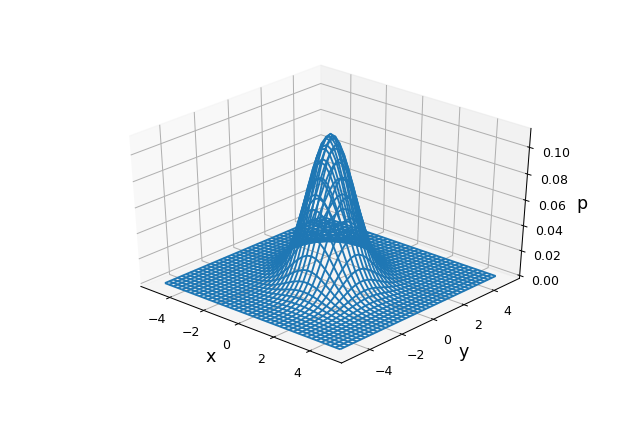

Text(0.5, 0, 'p')

In [44]:
# illustrate a 2-dimensional gaussian
%matplotlib notebook
fig = plt.figure()
ax = plt.axes(projection="3d")

g = np.linspace(-5,5,40)
x, y = np.meshgrid(g,g)
C = np.array([[3/2, -1/2],[-1/2, 3/2]])
iC = np.linalg.inv(C)
arg1 = iC[0,0]*x + iC[0,1]*y
arg2 = iC[1,0]*x + iC[1,1]*y
arg = x*arg1 + y*arg2  # elementwise multiplication
p = np.exp(-arg/2)/(2*np.pi*np.sqrt(np.linalg.det(C)))
ax.plot_wireframe(x,y,p)
ax.set_xlabel('x',fontsize=14)
ax.set_ylabel('y',fontsize=14)
ax.set_zlabel('p',fontsize=14)

\begin{myfig} \label{example:gaussian2}. The normal density function of (\ref{eq:pdfn}) with covariance matrix $C=[3\ -1;-1\ 3]/2$. \end{myfig}

Our Exer.\ref{ex:knee} provides a natural context for such a covariance matrix. In estimating the force required to move the knee-joint in Fig.\ref{example:knee} we suppose the true force to be 
$f=\|f\|(\cos(\theta),\sin(\theta))$ but that we mistake $\theta$ for $\theta+\delta$ and $\|f\|$ for $\|f\|+\eta$. As

\begin{equation*}
  \cos(\theta+\delta) \approx \cos(\theta) - \delta\sin(\theta) \and 
  \sin(\theta+\delta) \approx \sin(\theta) + \delta\cos(\theta)
\end{equation*}

it follows that errors in the force components at the $m$th experiment are

\begin{equation*}
  \eps_{m,0} = \eta_m\cos(\theta_m) - \delta_m\|f_m\|\sin(\theta_m) \and 
  \eps_{m,1} = \eta_m\sin(\theta_m) + \delta_m\|f_m\|\cos(\theta_m)
\end{equation*}
 
and so, presuming the $\delta_m$ to have zero mean and variance $\s^2(\delta)$, 
and $\eta_m$ to have zero mean and variance $\s^2(\eta)$, and that phase errors, $\delta_m$, are independent of magnitude errors, $\eta_m$, so $\mean(\delta_m\eta_m)=0$, we find

\begin{equation}\label{eq:kneenoise}
  \eqalign{
  \s_0^2 &= \s^2(\eta)\cos^2(\mean(\theta_m)) + \s^2(\delta)\mean(\|f_m\|)^2\sin^2(\mean(\theta_m)), \cr
  \s_{0,1} &= (\s^2(\eta)-\s^2(\delta)\mean(\|f_m\|)^2)\cos(\mean(\theta_m))\sin(\mean(\theta_m)) \cr
  \s_1^2 &= \s^2(\eta)\sin^2(\mean(\theta_m)) + \s^2(\delta)\mean(\|f_m\|)^2\cos^2(\mean(\theta_m)), \cr}
\end{equation}

If we assume that both variances are 1 and that the mean angle is $\pi/4$ and the mean squared amplitude is 2 we arrive at

\begin{equation*}
  \s_0^2 = 3/2, \hskip 0.25in \s_{0,1}=\s_{1,0}=-1/2, \hskip 0.25in \s_1^2 = 3/2,
\end{equation*}

the covariance matrix used in the construction of Fig. \ref{example:gaussian2}. NOTE THAT THE MEASUREMENT ERRORS PRESENT IN OUR BIAXIAL TEST PROBLEM TAINT THE A MATRIX NOT THE b VECTOR AND HENCE REQUIRE A WHOLE NEW THEORY (TOTAL LEAST SQUARES? EXERCISE?)


It follows that the probability of
obtaining the ideal output, $\hat b_j\in\maR^n$, given the input model, $a_j\in\maR^{n\times m}$, output measurement, $b_j\in\maR^n$, and putative model coefficients, $x\in\maR^m$, is

\begin{equation}
   p(\hat b_j|a_j;x) = \frac{1}{\sqrt{(2\pi)^n\det(C)}}
        \exp(-(a_jx-b_j)^TC^{-1}(a_jx-b_j)/2). \label{eq:pbjC}
\end{equation}

On comparing this with our one-dimensional work, (\ref{eq:likeli}), we
would like to write the argument of $\exp$ as a perfect square. This can be achieved via the
  

\begin{proposition}\label{prop:cholfac}  **Cholesky Factorization**  \index{Cholesky Factorization} 
If $S$ is symmetric and 
positive definite then there exists a lower triangular matrix $L$, with 
positive diagonal elements, for which

\begin{equation}
  S = LL^T.  \label{eq:Chol0}
\end{equation}
\end{proposition}

**Proof:** From the symmetry of $S\in\maR^{n\times n}$ we may begin with the representation

\begin{equation*}
  S = \begin{bmatrix} s_{11} & S_{21}^T \\ S_{21} & S_{22}\end{bmatrix},
  \hskip 0.25in s_{11}\in\maR,\hskip 0.25in S_{21}\in\maR^{n-1},\hskip 0.25in
   S_{22}\in\maR^{(n-1)\times(n-1)}.
\end{equation*}

As $S$ is positive definite we may conclude that $s_{11}>0$ and

\begin{equation}
  S_{22}-\frac{1}{s_{11}}S_{21}S_{21}^T
  \hskip 0.25in\hbox{is positive definite.}   \label{eq:Chol1}
\end{equation}

To prove the first claim choose $x=(1,0,\ldots,0)^T$
and note that $0<x^TSx=s_{11}$. To establish (\ref{eq:Chol1}) write
$x=(x_1,\tilde x)^T$ with $x_1\in\maR$ and confirm that

\begin{equation}
  x^TSx = s_{11}x_1^2 + 2x_1S_{21}^T\tilde x + \tilde x^TS_{22}\tilde x.
  \label{eq:Chol2}
\end{equation}

Next, show that you may choose $x_1$ such that

\begin{equation}
  s_{11}x_1^2 + 2x_1S_{21}^T\tilde x - S_{21}^TS_{21} = 0
   \label{eq:Chol3}
\end{equation}

and conclude that this choice confirms the claim in (\ref{eq:Chol1}).

With these preliminaries we proceed to construct the factorization

\begin{equation*}
  \begin{bmatrix} s_{11} & S_{21}^T \\ S_{21} & S_{22}\end{bmatrix}
  = \begin{bmatrix} l_{11} & 0 \\ L_{21} & L_{22}\end{bmatrix}
  \begin{bmatrix} l_{11} & L_{21}^T \\ 0 & L^T_{22}\end{bmatrix}
  = \begin{bmatrix} l_{11}^2 & l_{11}L_{21}^T \\ 
      l_{11}L_{21} & L_{21}L_{21}^T+L_{22}L_{22}^T\end{bmatrix}.
\end{equation*}  

Identifying terms we find

\begin{equation}
  l_{11}=\sqrt s_{11}, \hskip 0.25in L_{21}=S_{21}/l_{11} \and
    L_{22}L_{22}^T = S_{22}-S_{21}S_{21}^T/s_{11}. \label{eq:Chol6}
\end{equation}

The first two equalities are explicit and, thanks to $s_{11}>0$,
unambiguous. Regarding the third assignment in (\ref{eq:Chol6}) 
we note that its right hand side is symmetric by inspection and
positive definite by the argument following (\ref{eq:Chol3}). As
such, the third assignment in (\ref{eq:Chol6}) is simply the 
Cholesky factorization of the $n-1$ dimensional matrix
$S_{22}-S_{21}S_{21}^T/s_{11}$. Applying the above scheme to this
will reduce our needs to the Cholesky factorization of an $n-2$
dimensional matrix. Continuing this process brings us the trivial
one dimensional factorization. **End of Proof.**

This has an easy corollary that at least confirms the positivity under the radical in (\ref{eq:pdfn}).

\begin{corollary}\label{cor:SPDdet+}
If $S$ is symmetric and positive definite then $\det(S)>0$.
\end{corollary}

**Proof:** $\det(S)=\det(LL^T)=\det(L)\det(L^T)>0$. **End of Proof.**




To implement the algorithm at the center of the proof of (\ref{eq:Chol0})
we simply build the columns of $L$ from longest to shortest.
For example, we build the first column

\begin{equation*}
  \begin{bmatrix} 4 & 8 & 16 \\ 8 & 52 & 92 \\ 16 & 92 & 308 \end{bmatrix}
  = \begin{bmatrix} 2 & 0 & 0 \\ 4 & l_{22} & 0 
      \\ 8 & l_{32} & l_{33} \end{bmatrix}
  \begin{bmatrix} 2 & 4 & 8 \\ 0 & l_{22} & l_{32} 
    \\ 0 & 0 & l_{33} \end{bmatrix}
\end{equation*}

by dividing the original first column by the square root of its first
element. Proceeding on to the second column we find

\begin{equation*}
  \begin{bmatrix} 52 & 92 \\ 92 & 308 \end{bmatrix}
  - \begin{bmatrix} 4 \\ 8 \end{bmatrix}
   \begin{bmatrix} 4 & 8 \end{bmatrix}
  = \begin{bmatrix} l_{22} & 0 \\ l_{32} & l_{33} \end{bmatrix}
    \begin{bmatrix} l_{22} & l_{32} \\ 0 & l_{33} \end{bmatrix}
\end{equation*}

that is,

\begin{equation*}
  \begin{bmatrix} 36 & 60 \\ 60 & 244  \end{bmatrix}
  = \begin{bmatrix} 6 & 0 \\ 10 & l_{33} \end{bmatrix}
    \begin{bmatrix} 6 & 10 \\ 0 & l_{33} \end{bmatrix}
\end{equation*}

and finally $l_{33}^2=244-100$ and so $l_{33}=12$. All together, 

\begin{equation*}
  \begin{bmatrix} 4 & 8 & 16 \\ 8 & 52 & 92 \\ 16 & 92 & 308 \end{bmatrix}
  = \begin{bmatrix} 2 & 0 & 0 \\ 4 & 6 & 0 
      \\ 8 & 10 & 12 \end{bmatrix}
  \begin{bmatrix} 2 & 4 & 8 \\ 0 & 6 & 10
    \\ 0 & 0 & 12 \end{bmatrix}.
\end{equation*}

Returning to (\ref{eq:pbjC}) we factor $C=LL^T$ and note that its
inverse then factors as $C^{-1}=(L^{-1})^TL^{-1}$ and so

\begin{equation*}
   p(\hat b_j|a_j;x) = \frac{1}{\sqrt{(2\pi)^n\det(C)}}
        \exp(-\|L^{-1}(a_jx-b_j)\|^2/2).
\end{equation*}

Again using independence, after stacking and blocking we find

\begin{equation*}
   p(\hat b|A;x) = \frac{1}{((2\pi)^n\det(C))^{m/2}}
        \exp(-\|L^{-1}(Ax-b)\|^2/2).
\end{equation*}

It follows that the $x$ that maximizes the likelihood is the $x$ that minimizes
$\|L^{-1}(Ax-b)\|$ which in turn is the $x$ that satisfies the
 **weighted least squares problem** \index{weighted least square}
 
\begin{equation}
  \boxed{A^TC^{-1}Ax = A^TC^{-1}b} \label{eq:Wlsq}
\end{equation} 

Let us see how this works in on our knee-joint problem.

[10.02596217 20.07085641]
[10.00443828 20.11390419]


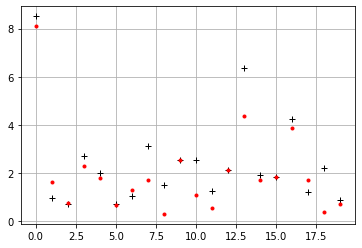

In [121]:
# knee-joint stiffness weighted least squares

%matplotlib inline

s = 1/np.sqrt(2)
A = np.array([[s, -s],[0, 1]])
ktru = np.array([50, 100])
S = A.T@np.diag(ktru)@A

phitru1 = np.pi/4
ftru1 = 2*np.array([np.cos(phitru1), np.sin(phitru1)])
xtru1 = np.linalg.solve(S, ftru1)
B1 = np.array([[(xtru1[0]-xtru1[1])/2, 0],[(xtru1[1]-xtru1[0])/2, xtru1[1]]])

phitru2 = -np.pi/4
ftru2 = 2*np.array([np.cos(phitru2), np.sin(phitru2)])
xtru2 = np.linalg.solve(S, ftru2)
B2 = np.array([[(xtru2[0]-xtru2[1])/2, 0],[(xtru2[1]-xtru2[0])/2, xtru2[1]]])

B = np.vstack((B1,B2))

sigma_phi = 0.05
sigma_mag = 0.05

mbestk = np.zeros(2)
mwbestk = np.zeros(2)

for r in range(20):

    phi1 = phitru1 + sigma_phi*np.random.randn()
    f1 = (2 + sigma_mag*np.random.randn())*np.array([np.cos(phi1), np.sin(phi1)])
    s00 = sigma_phi**2*np.cos(phitru1)**2 + sigma_mag**2*4*np.sin(phitru1)**2
    s01 = (sigma_phi**2 -4*sigma_mag**2)*np.cos(phitru1)*np.sin(phitru1)
    s11 = sigma_phi**2*np.sin(phitru1)**2 + sigma_mag**2*4*np.cos(phitru1)**2

    C1 = np.array([[s00, s01],[s01, s11]])
    L1 = np.linalg.cholesky(C1)
    L1i = np.linalg.inv(L1)

    phi2 = phitru2 + sigma_phi*np.random.randn()
    f2 = (2 + sigma_mag*np.random.randn())*np.array([np.cos(phi2), np.sin(phi2)])
    s00 = sigma_phi**2*np.cos(phitru2)**2 + sigma_mag**2*4*np.sin(phitru2)**2
    s01 = (sigma_phi**2 - 4*sigma_mag**2)*np.cos(phitru2)*np.sin(phitru2)
    s11 = sigma_phi**2*np.sin(phitru2)**2 + sigma_mag**2*4*np.cos(phitru2)**2
    C2 = np.array([[s00, s01],[s01, s11]])
    L2 = np.linalg.cholesky(C2)
    L2i = np.linalg.inv(L2)

    Z2 = np.zeros((2,2))
    Li = np.block([[L1i, Z2],[Z2, L2i]])

    f = np.hstack((f1,f2))

    bestk = np.linalg.lstsq(B, f, rcond=None)[0]
    #print(bestk)
    #plt.plot(bestk[0],bestk[1],'k+')
    mbestk = mbestk + bestk
    var = np.linalg.norm(bestk-ktru)
    plt.plot(r,var,'k+')

    wbestk = np.linalg.lstsq(Li@B, Li@f, rcond=None)[0]
    #print(wbestk)
    #plt.plot(wbestk[0],wbestk[1],'r.')
    mwbestk = mwbestk + wbestk
    wvar = np.linalg.norm(wbestk-ktru)
    plt.plot(r,wvar,'r.')
    
plt.grid('on')
#plt.axis('equal')

print(mbestk/100)

print(mwbestk/100)




We conclude with demonstrations that our least squares solvers are best among all linear, unbiased estimators.
We start with the single-measurement case and call 

\begin{equation*}
  E_{LS}\equiv (A^TA)^{-1}A^T
\end{equation*}

the **Least Squares Estimator**. We note that $E_{LS}b$ is clearly linear in $b$ 
and we show here that if the measurement errors
are independent and drawn from a distribution 
with mean zero then $E_{LS}$ produces less variance than any other linear, unbiased estimator. 

A linear estimator $E$ is called  **unbiased**  if the mean
value of $Eb$ is $x$. As

\begin{equation*}
  \mean(Eb) = \mean(EAx + E\eps)= EAx + E\mean(\eps) = EAx
\end{equation*}

and so $E$ is unbiased iff $EA=I$. Please note that $E_{LS}$ is 
indeed unbiased. It follows that the variance of the unbiased estimate
is simply

\begin{equation}
  \var(Eb) \equiv \mean((Eb-x)(Eb-x)^T) 
   = \mean((E(Ax-\eps)-x)(E(Ax-\eps)-x)^T) = E\var(\eps)E^T = \s^2EE^T.  \label{eq:varEb}
\end{equation}

From here we can now establish that $E_{LS}b$ is best in the sense that
it has the least variance, in the sense of positive definite matrices.

To begin we write $E=E_{LS}+D$ and note that $EA=I$ implies
$DA=0$ and so $DE_{LS}^T=E_{LS}D=0$. As such, (\ref{eq:varEb}) yields

\begin{equation*}
  \var(Eb) =  \s^2EE^T =\s^2(E_{LS}+D)(E_{LS}+D)^T = \var(E_{LS}b) + \s^2 DD^T.
\end{equation*} 

As $DD^T$ is a positive semidefinite we have shown that

\begin{equation*}
  y^T\var(E_{LS}b)y \le y^T\var(Eb)y
\end{equation*}

for every vector $y$ and every Linear Unbiased Estimator, $E$.

In the multivariate case where $\var(\eps)=C$ we again invoke the Cholesky 
factorization, $C=LL^T$, \index{Cholesky Factorization}
%upon $E_{LS}=(A^TC^{-1}A)^{-1}A^TC^{-1}$
to transform $b=Ax+\eps$ to 

\begin{equation*}
  \tilde b = \tilde A x + \tilde\eps, \where \tilde b = L^{-1}b, \ \tilde A = L^{-1}A
   \and \tilde\eps=L^{-1}\eps.
\end{equation*}

This decorrelates the error terms for

\begin{equation*}
  \var(\tilde\eps)=\var(L^{-1}\eps)=L^{-1}CL^{-T}= L^{-1}LL^TL^{-T} = I.
\end{equation*}

And so we may argue as above that

\begin{equation*}
  \var(E\tilde b) = E\var(\tilde b)E^T = (E_{LS}+D)(E_{LS}+D)^T
   = \var(E_{LS}\tilde b) + DD^T
\end{equation*} 

where 

\begin{equation*}
  E_{LS} = (\tilde A^T\tilde A)^{-1}\tilde A^T 
         = (A^TL_n^{-T}L_n^{-1}A)^{-1}A^TL_n^{-T}L_n^{-1}
          =(A^TC^{-1}A)^{-1}A^TC^{-1}
\end{equation*}

as above.

\begin{exercise}\label{ex:pdf1pf} Let us confirm that the density in (\ref{eq:pdf1})
indeed obeys

\begin{equation}
  \int_{-\infty}^\infty \exp(-t^2/(2\s^2))\,dt = \s\sqrt{2\pi}
    \label{eq:gaussnorm}
\end{equation}

Hint: Justify each step in

\begin{equation*}{\small \eqalign{
  \left(\int_{-\infty}^\infty \exp(-t^2/(2\s^2))\,dt\right)^2 &=
  \int_{-\infty}^\infty \exp(-t_1^2/(2\s^2))\,dt_1
\int_{-\infty}^\infty \exp(-t^2_2/(2\s^2))\,dt_2 =
  \int_{-\infty}^\infty\int_{-\infty}^\infty \exp(-(t^2_1+t_2^2)/(2\s^2))\,dt_1dt_2. \cr
  &= \int_0^{2\pi}\int_0^\infty \exp(-r^2/(2\s^2))r\,drd\theta, \cr}}
\end{equation*}

then notice that the final integrand is constant in $\theta$ and is proportional to the derivative of a clean function of $r$.
\end{exercise}

\begin{exercise}\label{ex:momgauss} The $n$th moment of a function $f$ on $\maR$ is

\begin{equation*}
  \mu_n(f) \equiv \int_{-\infty}^\infty x^nf(x)\,dx.
\end{equation*}

Please compute the moments of the Gaussian density. In particular, 
show that $\mu_n(p)=0$ when $n$ is odd while for even $n$ that

\begin{equation}
  \mu_{2m}(p) = (2m-1)!!\s^{2m}.   \label{eq:momgauss}
\end{equation}

where $(2m-1)!!=(2m-1)(2m-3)\cdots(2m-(2m-1))$ denotes factorials through the odds.
Hint: show that

\begin{equation*}
  \mu_{2m}(p) = -\s^2\int_{-\infty}^\infty x^{2m-1}p'(x)\,dx
\end{equation*}

and then integrate by parts.
\end{exercise}


\begin{exercise}\label{ex:entgauss} The entropy of a positive function $f$ is

\begin{equation*}
  S(f) \equiv -\int_{-\infty}^\infty f(x)\log\,f(x)\,dx   
\end{equation*}

is a measure of its disorder or variability.
Use the results of the previous exercise to compute the entropy of the gaussian:

\begin{equation}
  S(p) = (1+\log(2\pi)+\log(\s^2))/2. \label{eq:entgauss}
\end{equation}
\end{exercise}


\begin{exercise}\label{ex:cholpf} Prove (\ref{eq:Chol1}) by following the hints in 
(\ref{eq:Chol2})-(\ref{eq:Chol3}).
\end{exercise}

\begin{exercise}\label{ex:cholco} Code Cholesky and contrast with ${\rm numpy.linalg.cholesky}$.
\end{exercise}

## Projections

From an algebraic point of view (\ref{eq:n3}) is an elegant reformulation
of the least squares problem. Though easy to remember it unfortunately
obscures the geometric content, suggested by the word projection,
of (\ref{eq:n2}). As projections
arise frequently in many applications we pause here to develop them
more carefully.

With respect to the normal equations we note that if $\N(A)=\{0\}$ then

\begin{equation*}
  x = (A^TA)^{-1}A^Tb
\end{equation*}

and so the orthogonal projection of $b$ onto $\Ra(A)$ is

\begin{equation}
  b_R = Ax = A(A^TA)^{-1}A^Tb. \label{eq:proj}
\end{equation}

Defining 

\begin{equation}
  P=A(A^TA)^{-1}A^T, \label{eq:Proj}
\end{equation} 

(\ref{eq:proj}) takes the form $b_R=Pb$. Commensurate with our notion of what
a projection should be we expect that $P$ map vectors not in $\Ra(A)$
onto $\Ra(A)$ while leaving vectors already in $\Ra(A)$ unscathed.
More succinctly, we expect that $Pb_R=b_R$, i.e., $PPb=Pb$. As the latter
should hold for all $b\in\maR^m$ we expect that

\begin{equation}
  P^2 = P. \label{eq:P2}
\end{equation}

With respect to (\ref{eq:Proj}) we find that indeed

\begin{equation*}
  P^2 = A(A^TA)^{-1}A^TA(A^TA)^{-1}A^T = A(A^TA)^{-1}A^T = P.
\end{equation*}

We also note that the $P$ in (\ref{eq:Proj}) is symmetric. We dignify
these properties through

\begin{definition}\label{def:lsq2d} A matrix $P$ that satisfies $P^2=P$ is called
a **projection** . A symmetric projection is called an **orthogonal projection**.
\end{definition}

We have taken some pains to motivate the use of the word projection.
You may be wondering however what symmetry has to do with orthogonality.
We explain this in terms of the tautology

\begin{equation*}
  b = Pb + (I-P)b.
\end{equation*}

Now, if $P$ is a projection then so too is $(I-P)$. Moreover, if $P$
is symmetric then the inner product of $b$'s two constituents is

\begin{equation*}
  (Pb)^T(I-P)b = b^TP^T(I-P)b = b^T(P-P^2)b = b^T0b = 0,
\end{equation*}

i.e., $Pb$ is orthogonal to $(I-P)b$.

As an example, for the $A$ of (\ref{eq:smallsq}) we find

\begin{equation*} \label{eq:jnk70}
  P = A(A^TA)^{-1}A^T = \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 0 \end{bmatrix}
\end{equation*}

as suggested by Fig. \ref{example:lsqfig}. 

It is very useful to even develop expressions for the projection onto a line. In this case $A$ is the single column,
let us denote it by $a$, and the associated projection matrix is the scaled outer product

\begin{equation}
  P = aa^T/(a^Ta).  \label{eq:P1d}
\end{equation}

For example,

\begin{equation}
  P = \frac{1}{2}\begin{bmatrix}1 & 1 \\ 1 & 1\end{bmatrix}
   \label{eq:Pline}
\end{equation}

is orthogonal projection onto the line through $a=(1,1)$. We illustrate
this in Fig. \ref{example:lineproj}.

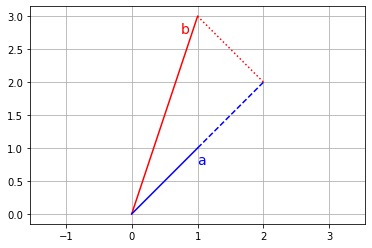

In [7]:
# lineproj
%matplotlib inline
plt.plot([0, 1],[0, 3],'r')
plt.text(0.75, 2.75,'b',color='r', fontsize=14)
plt.plot([0, 1],[0, 1],'b')
plt.text(1, 0.75,'a',color='b', fontsize=14)
plt.plot([1, 2],[1, 2],'b--')
plt.plot([1, 2],[3, 2],'r:')
plt.axis('equal')
plt.grid('on');

\begin{myfig} \label{example:lineproj}. The projection of $b=(1,3)$ onto the line
through $a=(1,1)$ via the projection matrix, (\ref{eq:Pline}). \end{myfig}

\begin{exercise}\label{ex:lsq3} Find the matrix that projects $\maR^3$ onto the line spanned
by $[1\ 0\ 1]^T$.
\end{exercise}

\begin{exercise}\label{ex:lsq4} Find the matrix that projects $\maR^3$ onto the plane spanned
by $[1\ 0\ 1]^T$ and $[1\ 1\ -1]^T$.
\end{exercise}

\begin{exercise}\label{ex:lsq5} If $P$ is the projection of $\maR^m$ onto a $k$-dimensional
subspace $M$, what is the rank of $P$ and what is $\Ra(P)$?
\end{exercise}

\begin{exercise}\label{ex:normP} Show that if $P$ is an orthogonal projection onto a subspace of
dimension $r$ then $\|P\|_F=\sqrt r$.
\end{exercise}

\begin{exercise}\label{ex:eyemp} Show that if $P$ is a projection then so too are $P^T$ and $I-P$.
\end{exercise}

\begin{exercise}\label{ex:pnonsing} Show that the only invertible projection is the identity matrix.
\end{exercise}

\begin{exercise}\label{ex:pairproj} (a) Show that if $P$ and $Q$ are projections then
\begin{equation*}
  (P-Q)^2 + (I-P-Q)^2 = I.
\end{equation*}
(b) Use (a) to show that if $P$ and $Q$ are orthogonal projections then
$\|P-Q\|\le 1$.
\end{exercise}

\begin{exercise}\label{ex:nonsymP} Not all projections are symmetric. Please confirm that
\begin{equation*}
  \begin{bmatrix}1 & 0 \cr 1 & 0 \end{bmatrix}
  \and \begin{bmatrix}1 & 0 & 0 \cr -1/2 & 0 & 0 \cr -1/4 & -1/2 & 1 \end{bmatrix}
\end{equation*}
are projections. Sketch the column space of the first, and depict the oblique
projection of $b=(1,3)^T$ onto this space. How does your sketch differ from 
Fig. \ref{example:lineproj}?
\end{exercise}

## The QR Decomposition

While linear independence remains a central concept we shall see that
representations are often more concise and computations are always more
robust when the relevant basis vectors are chosen to be 
"maximally independent," i.e., orthogonal.  Projections are a natural
means for transforming a basis for a space $M$ to an orthonormal basis 
for $M$.

\index{Gram-Schmidt Procedure}
This process, known as the  **Gram-Schmidt Procedure** ,
takes $n+1$ basis vectors, $\{x_j:j=0,\ldots,n\}$, for a subspace $M$ and returns
$n+1$ orthonormal vectors, $q_j$, in $M$. 


**GS0:**  Set $y_0=x_0$ and $q_0=y_0/\|y_0\|$.

**GS1:**  $y_1=x_1$ minus the projection of $x_1$ onto the line spanned by 
$q_0$.  That is

\begin{equation*}
  y_1 = x_1 - q_0(q_0^Tq_0)^{-1}q_0^Tx_1 = x_1 - q_0q_0^Tx_1.
\end{equation*}

Set $q_1=y_1/\|y_1\|$ and $Q_1=[q_0\ q_1]$.

**GS2:**  $y_2=x_2$ minus the projection of $x_2$ onto the plane spanned by 
$q_0$ and $q_1$.  That is

\begin{equation*}
  \eqalign{y_2
  & = x_2 - Q_1(Q_1^TQ_1)^{-1}Q_1^Tx_2 \cr
  & = x_2 - q_0q_0^Tx_2 - q_1q_1^Tx_2. \cr}
\end{equation*}

Set $q_2=y_2/\|y_2\|$ and $Q_2=[q_0\ q_1\ q_2]$.

Continue in this fashion through step

**GSn:**  $y_n=x_n$ minus its projection onto the subspace spanned by the
columns of $Q_{n-1}$. That is

\begin{equation*}
  \eqalign{y_n
  & = x_n - Q_{n-1}(Q_{n-1}^TQ_{n-1})^{-1}Q_{n-1}^Tx_n \cr
  & = x_n - \sum_{j=1}^{n-1}q_jq_j^Tx_n. \cr}
\end{equation*}

Set $q_n=y_n/\|y_n\|$ and $Q=[q_0,q_1,\ldots,q_n]$.

As the resulting $Q\in\maR^{m\times n}$ has orthonormal columns it follows 
that $Q^TQ=I$. We call such a $Q$ an  **orthogonal matrix** . It follows that
if $m=n$ then $Q^T=Q^{-1}$. \index{orthogonal matrix}

To take a simple example, let us orthogonalize the following basis for $\maR^3$,

\begin{equation}
  x_0=[1\ 0\ 0]^T,\hskip 0.25in x_1=[1\ 1\ 0]^T,\hskip 0.25in x_2=[1\ 1\ 1]^T.  \label{eq:gsex}
\end{equation}

**GS0:**  $q_0=y_0=x_0$.

**GS1:**  $y_1=x_1-q_0q_0^Tx_1=[0\ 1\ 0]^T$, and so $q_1=y_1$.

**GS2:**  $y_2=x_2-q_0q_0^Tx_2 -q_1q_1^Tx_2=[0\ 0\ 1]^T$, and so $q_2=y_2$.

We have arrived at the canonical basis 
 
\begin{equation}
  q_0=[1\ 0\ 0]^T,\hskip 0.25in q_1=[0\ 1\ 0]^T,\hskip 0.25in q_2=[0\ 0\ 1]^T. \label{eq:gsexq}
\end{equation}

Once the idea is grasped the actual calculations are best left to a machine.
scipy.linalg accomplishes this via the  ${\rm scipy.linalg.orth}$   command. 

Its implementation is
a bit more sophisticated than a blind run of steps  **GS1-n** .
As a result, there is no guarantee that it will return the same basis.
For example, here is a python cell of  *orth* applied to (\ref{eq:gsex})

In [8]:
# orth demo
    
from scipy.linalg import orth 
X = np.array([[1, 1, 1],[0, 1, 1],[0, 0, 1]])  
Q = orth(X)
print(Q)

[[ 0.73697623  0.59100905  0.32798528]
 [ 0.59100905 -0.32798528 -0.73697623]
 [ 0.32798528 -0.73697623  0.59100905]]


This ambiguity does not bother us, for one orthogonal basis is as 
good as another. In fact, we can often get by just knowing that an
orthonormal basis exists. For example, lets show that orthogonal bases permit
us to easily "see" the rank of a projection.

\begin{proposition}\label{prop:lsq3} If $P=P^2$ then $\tr(P)={\rm rank}(P)$.
\end{proposition}

**Proof:** We suppose that $P\in\maR^{n\times n}$ and denote by $r$ the rank of $P$.
We suppose that $\{q_1,\ldots,q_r\}$ is an orthonormal basis for $\Ra(P)$ and
that $\{q_{r+1},\ldots,q_n\}$ is an orthonormal basis for $\N(P^T)$. 

We set $Q=[q_1\ q_2\ \cdots q_n]$ and proceed to compute the trace of $Q^TPQ$.
We note that the diagonal element $(Q^TPQ)_{j,j} = q_j^TPq_j$. If $j\le r$
we find $Pq_j=q_j$ and so $(Q^TPQ)_{j,j}=1$ while if $j>r$ then $q_j^TP=0$ and
hence $(Q^TPQ)_{j,j}=0$. It follows that $\tr(Q^TPQ)=r$. To connect this to
$\tr(P)$ we invoke the product formula, (\ref{eq:trcomm}), and find

\begin{equation}
  \tr(Q^TPQ)=\tr(Q^TQP)=\tr(IP)=\tr(P),  \label{eq:trP0}
\end{equation}

where we've used the fundamental theorem of linear algebra to ensure that
$Q^TQ=I$. **End of Proof.**

A more concrete use for the Gram-Schmidt Procedure will follow from viewing
it as a factorization of $X$. More precisely, we wish to interpret the procedure
as expressing each $x_j$ as a linear combination of the $q_i$ for $i\le j$.
This is simple for $j=1$, namely  **GS1**  states

\begin{equation}
    x_1 = (q_1^Tx_1)q_1.  \label{eq:QR1}
\end{equation}

Unpacking  **GS2**  we next find that

\begin{equation}
  x_2 = (q_1^Tx_2)q_1 + \|x_2-(q_1^Tx_2)q_1\|q_2, \label{eq:QR2pre}
\end{equation}

is indeed a linear combination of $q_1$ of $q_2$. The awkward norm term can
be reduced by simply taking the inner product of each side of (\ref{eq:QR2pre}) 
with $q_2$. As $q_i^Tq_j=\delta_{ij}$ this yields

\begin{equation*}
  q^T_2x_2 = \|x_2-(q_1^Tx_2)q_1\|
\end{equation*}

and so, in fact (\ref{eq:QR2pre}) takes the form

\begin{equation}
    x_2 = (q_1^Tx_2)q_1 + (q_2^Tx_2)q_2. \label{eq:QR2}
\end{equation}

We next continue this line of argument and find that

\begin{equation}
    x_j = (q_1^Tx_j)q_1 + (q_2^Tx_j)q_2 + \cdots + (q_j^Tx_j)q_j. \label{eq:QRj}
\end{equation}

for each $j$ up to $n$. That each $x_j$ is expressed in terms of $q_i$ for $i\le j$
manifests itself in a triangular decomposition. Namely,
we recognize that (\ref{eq:QR1}, \ref{eq:QR2} and \ref{eq:QRj}), when collected, take the form

\begin{equation*}
    (x_1,x_2,\ldots,x_n) = (q_1,q_2,\ldots,q_n)
   \begin{bmatrix} q_1^Tx_1 & q_1^Tx_2 & \cdots & \cdots& q_1^Tx_n \\
                    0 &  q_2^Tx_2 & q_2^Tx_3 & \cdots & q_2^Tx_n \\
                    0 & 0 & q_3^Tx_3 & \cdots & q_3^Tx_n \\
                    \vdots & \ddots & \ddots & \ddots & \vdots \\
                     0 & \cdots & 0 & 0 & q_n^Tx_n \end{bmatrix}.
\end{equation*}

This matrix of $q_j$ is simply the $Q$ produced by Gram-Schmidt. The remaining upper
triangular matrix is typically denoted $R$. As none of its diagonal elements may vanish, it is
invertible. We have now established

\begin{proposition}\label{prop:lsq4} If $X\in\maR^{m\times n}$ has linearly independent columns
then there exists an orthonormal $Q\in\maR^{m\times n}$ and a nonsingular upper triangular $R\in\maR^{n\times n}$
such that
\begin{equation}
  X = QR. \label{eq:qrfac}
\end{equation}
\end{proposition}

This result offers a potentially dramatic rewrite of the least squares problem, $Ax=b$. For recall
that if $x\ne\Ra(A)$ we instead must solve the normal equations, $A^TAx=A^Tb$. Of course we may
solve this via the LU factorization of Chapter 3. If
we instead factor $A=QR$ then the normal equations become $R^TRx=R^TQ^Tb$. However, $R^T$ inherits
its nonsingularity from $R$ and so we may multiply each side by $(R^T)^{-1}$ and arrive at the
reduced normal equations

\begin{equation}
  \boxed{Rx = Q^Tb.} \label{eq:rednorm} 
\end{equation}

As $R$ is upper triangular, this may be solved by a single sweep of back substitution,
without ever even having to construct $A^TA$. We note that numpy generates $Q$ and $R$ 
via its  *numpy.linalg.qr* function.

To take a concrete example, with the $A$ and $b$ of (\ref{eq:smallsq}) we find

\begin{equation*}
  Q = \begin{bmatrix} 1 & 0 \\ 0 & 1 \\ 0 & 0 \end{bmatrix}, \hskip 0.25in
  R = \begin{bmatrix} 1 & 1 \\ 0 & 1 \end{bmatrix} \and Q^Tb = \begin{bmatrix} 1  \\  1 \end{bmatrix}
\end{equation*}

and so (\ref{eq:rednorm}) takes the form

\begin{equation*}
  \begin{bmatrix} 1 & 1 \\ 0 & 1 \end{bmatrix}\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} =
      \begin{bmatrix} 1  \\  1 \end{bmatrix},
\end{equation*}

and $x_2=1$ and $x_1=0$ as expected.

\begin{exercise}\label{ex:Qstr} Show that orthonormal matrices stretch no vector, i.e., if
$Q^TQ=I$ then $\|Qx\|=\|x\|$ for all $x$.
\end{exercise}

\begin{exercise}\label{ex:gsfun} Use the Gram-Schmidt procedure, by hand (don't even use a calculator, 
for they replace pregnant square roots with chaotic decimals), to compute orthonormal
bases for the four fundamental subspaces of
\begin{equation}
  A = \begin{bmatrix} 1 & 2 & 5 & 3 \\ 3 & 1 & 5 & 4 \\ 2 & -1 & 0 & 1 \\ 1 & 2 & 5 & 3
      \end{bmatrix}. \label{eq:BGS}
\end{equation}
\end{exercise}

\begin{exercise}\label{ex:qrfun} Construct, by hand, the QR decomposition of 
\begin{equation*} 
  A = \begin{bmatrix} 1 & 1 \\ 2 & 1 \\ 4 & 1 \end{bmatrix}
\end{equation*}
and contrast this that returned by *numpy.linalg.qr*.
\end{exercise}

\begin{exercise}\label{ex:GSviaDet} We develop an explicit, as opposed to recursive, representation of the Gram-Schmidt process, using of the cofactor expansion of the determinant developed in Chapter 3.

(a) Build

\begin{equation*}
 X_k = [x_0,\ x_1, \ldots, x_k], \hskip 0.25in G_k = X_k^TX_k,  
\end{equation*}

and confirm that the linear independence of the $x_j$ makes $G_k$ positive definite and $D_k\equiv\det(G_k)>0$.

(b) Build $y_0=x_0$, $D_0=x_0^Tx_0$

\begin{equation}\label{eq:ykexplicit}
  y_k = \sum_{j=0}^k (-1)^{j+k}\det(G_k(!k,!j))x_j, \hskip 0.25in k>0.
\end{equation}

This make it clear that $y_k\in\span(X_k)$. To prove the converse, i.e., that $\span\{y_0,\ldots,y_k\}\subset\span(X_k)$,
show that (\ref{eq:ykexplicit}) may be written as the triangular system

\begin{equation*}
\eqalign{
y_0 &= x_0\\
y_1 &= D_0x_1 + (\text{linear combination of } x_0)\\
y_2 &= D_1x_2 + (\text{linear combination of } x_0, x_1)\\
\vdots \\
y_k &= D_{k-1}x_k + (\text{linear combination of } x_0, \ldots, x_{k-1})}
\end{equation*}

Now use conditions on the $D_j$ from part (a) to argue that this system allows you to express the $x_j$ as linear combinations of the $y_j$.

(c) Next argue that $y_k\perp X_{k-1}$ by showing that

\begin{equation*}
x_i^Ty_k = \sum_{j=0}^k(-1)^{j+k}\det(G_k(!k,!j)x_i^Tx_j
\end{equation*}

is the determinant of a matrix with two identical rows, and so vanishes.

(d) Next, use your work on parts (b) and (c) to argue that $\|y_k\|^2 = D_kD_{k-1}$ and so

\begin{equation*}
  q_k = \frac{y_k}{(D_kD_{k-1})^{1/2}},
\end{equation*}

is the explicit orthogonalization of the $X_k$.

(e) Finally, to show that this orthogonal system is exactly that produced by Gram-Schmidt we note in each case
the coefficient of $x_k$ in $q_k$ is positive.
\end{exercise}

## Orthogonal Polynomials* 

We consider the polynomials 

\begin{equation}
  e_0(x) = 1, \hskip 0.25in e_1(x)=x, \ldots,\ e_n(x) = x^n \label{eq:standpoly}
\end{equation}

and note they constitute a basis for their span, 
the space of polynomials of degree $n$,

\begin{equation*}
  \maP_n \equiv \{a_0e_0(x)+a_1e_1(x)+\cdots+a_ne_n(x):a\in\maR^{n+1}\}.
\end{equation*}

Given a function, say $f$, over some interval, say $[-1,1]$, it is very
common to attempt to approximate $f$ by a member of $\maP_n$ by solving the
least squares problem

\begin{equation}
  \min_{p\in\maP_n}\int_{-1}^1(f(x)-p(x))^2\,dx. \label{eq:L2min}
\end{equation}

As suggested by the last section, it might be considerably simpler if the
basis vectors of $\maP_n$ were orthogonal in a sense consistent with the
criterion in (\ref{eq:L2min}). More precisely, we consider the 
 **inner product** \index{inner product} 
 
\begin{equation}
  \ip{p}{q} \equiv \int_{-1}^1 p(x)q(x)\,dx,  \label{eq:L2ip}
\end{equation}

and use it to orthogonalize the $e_k$ of (\ref{eq:standpoly}).

\begin{equation}
  \eqalign{
  q_0(x) &= e_0(x) = 1 \cr
  q_1(x) &= e_1(x) - \ip{e_1}{q_0}q_0/\ip{q_0}{q_0} = x \cr
  q_2(x) &= e_2(x) - \ip{e_2}{q_1}q_1/\ip{q_1}{q_1} 
                   - \ip{e_2}{q_0}q_0/\ip{q_0}{q_0} 
   = x^2 - 1/3 \cr
  q_3(x) &= e_3(x) - \ip{e_3}{q_2}q_2/\ip{q_2}{q_2} 
           - \ip{e_3}{q_1}q_1/\ip{q_1}{q_1} 
           - \ip{e_3}{q_0}q_0/\ip{q_0}{q_0} = x^3 - 3x/5.} \label{eq:Legendre}
\end{equation}

These are called the  **Legendre polynomials** . We illustrate the first few
nonconstants in Fig. \ref{example:legendre}. \index{Legendre polynomials}

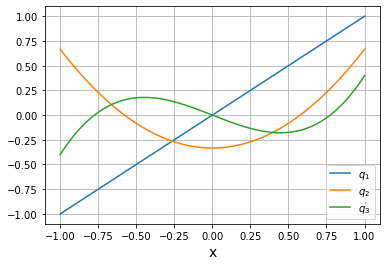

In [9]:
# First 3 Legendre Polynomials
%matplotlib inline
x = np.linspace(-1,1,100)
plt.plot(x,x)
plt.plot(x,x**2-1/3)
plt.plot(x,x**3-3*x/5)
plt.legend(['$q_1$','$q_2$','$q_3$'])
plt.xlabel('x',fontsize=14)
plt.grid('on');

\begin{myfig} \label{example:legendre}. The first three interesting Legendre polynomials. \end{myfig}

These basis elements now make it easy to find the best quadratic approximation to
$\cos(\pi x)$. More precisely, with
$f(x)=\cos(\pi x)$ and $p\in\maP_2$ we find that

\begin{equation}
  \eqalign{\int_{-1}^1(\cos(\pi x)-p(x))^2\,dx
  &= \int_{-1}^1(\cos(\pi x)-(a_0+a_1x+a_2(x^2-1/3)))^2\,dx \cr
%  &= \int_{-1}^1(\cos^2(\pi x)-2\cos(\pi x)(a_0+a_1x+a_2(x^2-1/3))+
%         (a_0+a_1x+a_2(x^2-1/3))^2)\,dx \cr
  &= 1 + (8/\pi^2)a_2 + 2a_0^2 + (2/3)a_1^2 + (8/45)a_2^2 \cr} \label{eq:bestquadc}
\end{equation}

takes its minimum at $a_0=a_1=0$ and $a_2=-45/(2\pi^2)$.
We illustrate the fit in Fig. \ref{example:cosfit}.

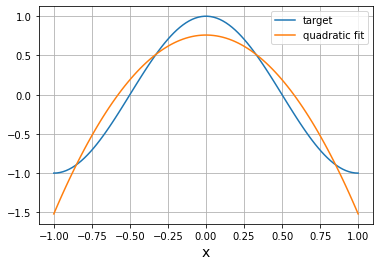

In [10]:
# cosfit with legendre
%matplotlib inline
plt.plot(x,np.cos(np.pi*x))
plt.plot(x,-45*(x**2-1/3)/2/np.pi**2)
plt.legend(['target','quadratic fit'])
plt.grid('on')
plt.xlabel('x',fontsize=14);

\begin{myfig} \label{example:cosfit} The best quadratic approximation to $\cos(\pi x)$, in the interval $[-1,1]$, is $45(1/3-x^2)/(2\pi^2)$. \end{myfig}


We now develop two other approaches to constructing these polynomials.


\begin{proposition}\label{prop:lsqOP1} Commencing from 
$q_{-1}(x)=0$ and $q_0(x)=1$ the Legendre polynomials
obey the three term recurrence

\begin{equation}
  q_{n+1}(x) = (x-\alpha_{n+1})q_n(x) - \beta_n q_{n-1}(x)
    \label{eq:legrec}
\end{equation}

where

\begin{equation*}
  \alpha_{n+1} = \frac{\ip{e_1q_n}{q_n}}{\ip{q_n}{q_n}}  \and
  \beta_n = \frac{\ip{q_n}{q_n}}{\ip{q_{n-1}}{q_{n-1}}} 
\end{equation*}
\end{proposition}

**Proof:** As the $q_n$ are each monic it follows that $q_{n+1}-xq_n$ is of order
no more than $n$ and so may be expressed as a linear combination of $q_0$
through $q_n$. Namely

\begin{equation}
  q_{n+1}(x)-xq_n(x) = -\alpha_{n+1}q_n-\beta_n q_{n-1} + \sum_{m=0}^{n-2}
    a_mq_m(x). \label{eq:recset}
\end{equation}

On taking the inner product of each side of (\ref{eq:recset}) with $q_n$ we find

\begin{equation*}
  \ip{e_1q_n}{q_n} = \alpha_{n+1}\ip{q_n}{q_n}.
\end{equation*}

On taking the inner product of each side of (\ref{eq:recset} with $q_{n-1})$ 
we find

\begin{equation*}
  \ip{e_1q_n}{q_{n-1}} = \beta_n\ip{q_{n-1}}{q_{n-1}}.
\end{equation*}

On taking the inner product of each side of (\ref{eq:recset} with $q_{n-2})$,
we find $0=a_{m-2}\ip{q_{n-2}}{q_{n-2}}$ and so $a_{m-2}=0$. Now moving through
decreasing indicies this argument establishes that $a_m=0$, $m=0,\ldots,n-2$.
It follows that (\ref{eq:recset}) reveals (\ref{eq:legrec}).
**End of Proof.**



We note that $\ip{e_1q_m}{q_m}=0$ by oddness and so each $\alpha_n=0$
while

\begin{equation*}
  \ip{q_0}{q_0}=2, \hskip 0.25in \ip{q_1}{q_1}=2/3, \hskip 0.25in
  \ip{q_2}{q_2}=8/45, \hskip 0.25in \ip{q_3}{q_3}=8/175, \hskip 0.25in
  \ip{q_4}{q_4}=128/11025,
\end{equation*}

yields

\begin{equation*}
  \beta_1=1/3, \hskip 0.25in \beta_2 = 4/15, \hskip 0.25in \beta_3 = 9/35, 
   \hskip 0.25in \beta_4=16/63 \hskip 0.25in
\end{equation*}

from which we infer

\begin{equation}
  \beta_n = \frac{n^2}{4n^2-1}   \label{eq:LegBeta}
\end{equation}

and so

\begin{equation*}
  q_{n+1}(x) = xq_n(x) - \frac{n^2}{4n^2-1}q_{n-1}(x).
\end{equation*}

There are a number of ways to normalize beyond monic. One standard
choice is to ask that each polynomial obey polynomial take the value 1 at $x=1$.
We observe from (\ref{eq:Legendre}) that $q_2(1)=2/3$, $q_3(1)=2/5=(3/5)q_2(1)$  and 
$q_4(1)=8/35=(4/7)q_3(1)$ and so deduce that

\begin{equation*}
  q_n(1) = \frac{n}{2n-1}q_{n-1}(1).
\end{equation*}

Hence, on defining

\begin{equation}
  P_n(x) \equiv \frac{(2n-1)!!}{n!}q_n(x) \label{eq:stanleg}
\end{equation} 

(where $!!$ denotes factorial through the odds)
we find $P_n(1)=1$.
What happens to the recurrence?

\begin{equation*}
  \frac{(n+1)!}{(2n+1)!!}P_{n+1}(x) = \frac{n!}{(2n-1)!!}xP_n(x) - 
    \frac{n!n}{(2n+1)!!}P_{n-1}(x).
\end{equation*}

multiply through by $(2n+1)!!/n!$ to get

\begin{equation}
  \boxed{(n+1)P_{n+1}(x) = (2n+1)xP_n(x) - nP_{n-1}(x).} \label{eq:legrecP}
\end{equation}

We have moved from the monic $q_n$ to the $P_n$ for which $P_n(1)=1$ when in applications we need the value of $\ip{P_n}{P_n}$. This we can get from the $\beta_n$
in (\ref{eq:LegBeta} and the rescaling \Eqref{stanleg}). Namely,

\begin{equation*}
  \eqalign{\ip{P_n}{P_n} &= \left(\frac{(2n-1)!!}{n!}\right)^2\ip{q_n}{q_n} \cr
  &= \left(\frac{(2n-1)!!}{n!}\right)^2\beta_n\ip{q_{n-1}}{q_{n-1}} \cr
  &= \left(\frac{(2n-1)!!}{n!}\right)^2\frac{n^2}{4n^2-1}\left(\frac{(n-1)!!}{(2n-3)!}\right)^2
  \ip{P_{n-1}}{P_{n-1}} \cr
  &= \frac{2n-1}{2n+1}\ip{P_{n-1}}{P_{n-1}}. \cr}
\end{equation*}

If we now continue this process we find

\begin{equation}
  \ip{P_n}{P_n} = \frac{(2n-1)(2n-3)}{(2n+1)(2n-1)}\ip{P_{n-2}}{P_{n-2}}=\cdots=
  \frac{1}{2n+1}\ip{P_0}{P_0} = \frac{2}{2n+1}.   \label{eq:LegNorm}
\end{equation}

The recurrence relation permits deeper study of the $P_n$. For example, it
will yield an explicit formula for 
the  **generating function** 

\begin{equation}
  \cP(x,t) \equiv \sum_{n=0}^\infty P_n(x)t^n  \label{eq:genfuncdef}
\end{equation}

of the $P_n$.  \index{generating function}
We begin our calculation of $\cP$ by noting that

\begin{equation}
  \cP(1,t) \equiv \sum_{n=0}^\infty t^n = \frac{1}{1-t} \label{eq:Gat1}
\end{equation}

and then using (\ref{eq:legrecP}) to write

\begin{equation}
  \sum_{n=1}^\infty(nP_n(x) - (2n-1)xP_{n-1}(x) + (n-1)P_{n-2}(x))t^n = 0.
   \label{eq:recinf}
\end{equation}

The basic idea is to translate this expression into a differential equation
for $\cP$. In what follows we will use the superscript prime $'$ to denote
differentiation with respect to $t$. With this we note that the first term in
(\ref{eq:recinf}) is actually

\begin{equation*}
  \sum_{n=1}^\infty nP_n(x)t^n = t \sum_{n=1}^\infty nP_n(x)t^{n-1}
  = t\cP'(x,t).
\end{equation*}

To get our hands on the second term we record
\begin{equation*}
  \sum_{n=1}^\infty (n-1)P_{n-1}(x)t^n = 
  t^2\sum_{n=1}^\infty (n-1)P_{n-1}(x)t^{n-2} = t^2\cP'(x,t)
\end{equation*}

and

\begin{equation*}
  \sum_{n=1}^\infty P_{n-1}(x)t^n = 
  t\sum_{n=1}^\infty P_{n-1}(x)t^{n-1} = t\cP(x,t)
\end{equation*}

and so deduce

\begin{equation*}
  \eqalign{x\sum_{n=1}^\infty (2n-1)P_{n-1}(x)t^n 
  &= 2x\sum_{n=1}^\infty (n-1)P_{n-1}(x)t^n + x\sum_{n=1}^\infty P_{n-1}(x)t^n \cr
  &= 2xt^2\cP'(x,t) + xt\cP(x,t).\cr}
\end{equation*}

Proceeding similarly, the last term in (\ref{eq:recinf}) becomes

\begin{equation*}
  \eqalign{\sum_{n=1}^\infty (n-1)P_{n-2}(x)t^n 
  &= t^3\sum_{n=1}^\infty (n-2)P_{n-2}(x)t^{n-3} + t^2\sum_{n=1}^\infty P_{n-2}(x)t^{n-2} \cr
  &= t^3\cP'(x,t) + t^2\cP(x,t).\cr}
\end{equation*}

It follows that (\ref{eq:recinf}) is equivalent to 
$t\cP'-2xt^2\cP'-xt\cP+t^3\cP'+t^2\cP=0$ or, after collecting terms, 

\begin{equation}
  (1-2xt+t^2)\cP' + (t-x)\cP = 0. \label{eq:Gode}
\end{equation}

To find a nonzero $\cP$ we separate the knowns from the unknowns in (\ref{eq:Gode}), 

\begin{equation*}
  \frac{\cP'}{\cP}=-\frac{1}{2}\frac{a'}{a} \where a(x,t)=1-2xt+t^2.
\end{equation*}

We recognize each side to be a logarithmic derivative, i.e.,

\begin{equation*}
  (\log \cP)' = -\frac{1}{2}(\log a)' \hskip 0.25in\hbox{so, upon integration}\hskip 0.25in
  \log \cP = -(1/2)\log a + c,
\end{equation*}

for some constant $c$. On taking the exponential of each side we find 
$\cP(x,t)=a^{-1/2}(x,t)\exp(c)$. On setting $x=1$ and using (\ref{eq:Gat1}) we find
$c=0$ and so 

\begin{equation}
  \boxed{\cP(x,t) = \frac{1}{\sqrt{1-2xt+t^2}}.} \label{eq:GenLeg}
\end{equation}

We will see in the exercises that 
this simple explicit generating function satisfies a beautiful partial
differential equation that in turn implies that the $P_n$ themselves
satisfy a family of ordinary differential equations.



The inner product, (\ref{eq:L2ip}), that we have used as our orthogonalizer gives equal
weight to all points on the interval $[-1,1]$. The theory we gave developed works for 
quite general  **weighted**  inner products. We will focus on two of these, the first being,

\begin{equation}
  \ip{f}{g}_T \equiv \int_{-1}^1 \frac{f(x)g(x)}{\sqrt{1-x^2}}\,dx
    \label{eq:cip}
\end{equation}

This places much greater weight at the ends. Under the change of variable
$x=\cos\phi$ this takes the more familiar form

\begin{equation}
 \ip{f}{g}_T \equiv \int_0^\pi f(\cos\phi)g(\cos\phi)\,d\phi.
    \label{eq:cipp}
\end{equation} 

If we denote by $c_n$ the orthogonalization of the standard basis, (\ref{eq:standpoly}), with
respect to (\ref{eq:cipp}) we find

\begin{equation}
  c_0(x) = 1, \hskip 0.25in c_1(x) = x, \hskip 0.25in c_2(x) = x^2-1/2, \hskip 0.25in c_3(x) = x^3 -3x/4
   \hskip 0.25in c_4(x) = x^4 - x^2 + 1/8.   \label{eq:Chebc}
\end{equation}

<!-- \if 1=0 % details
\begin{equation*}
  \ip{c_0}{c_0}_w = \pi \and
      \ip{c_1}{c_1}_w = \pi/2
\end{equation*}
and then
\begin{equation*}
  \eqalign{
  c_2(x) &= e_2(x) - \ip{e_2}{c_1}_w c_1/\ip{c_1}{c_1}_w
                  - \ip{e_2}{c_0}_w c_0/\ip{c_0}{c_0}_w \cr
   &= x^2 - \frac{2}{\pi}\int_0^\pi \cos^3(\phi)\,d\phi - 
          - \frac{1}{\pi}\int_0^\pi \cos^2(\phi)\,d\phi \cr
   &= x^2 - 1/2 \cr}
\end{equation*}
and so $\ip{c_2}{c_2}_w = \pi/8$.
and then
\begin{equation*}
  \eqalign{
  c_3(x) &= e_3(x) - \ip{e_3}{c_2}_w c_2/\ip{c_2}{c_2}_w
                  - \ip{e_3}{c_1}_w c_1/\ip{c_1}{c_1}_w \cr
                  - \ip{e_3}{c_0}_w c_0/\ip{c_0}{c_0}_w \cr
   &= x^3 - \frac{2}{\pi}\int_0^\pi \cos^4(\phi)\,d\phi - 
          - \frac{1}{\pi}\int_0^\pi \cos^2(\phi)\phi \cr
   &= x^3 - 3x/4 \cr}
\end{equation*}
and so $\ip{c_3}{c_3}_w = \pi/32$. 
and then
\begin{equation*}
  \eqalign{
  c_4(x) &= e_4(x) - \ip{e_4}{c_2}_w c_2/\ip{c_2}{c_2}_w
                  - \ip{e_4}{c_0}_w c_0/\ip{c_0}{c_0}_w \cr
   &= x^4 - c_2 -  -3/8 = x^4 - x^2 + 1/8\cr}
\end{equation*}
and so $\ip{c_4}{c_4}_w = \pi/128$. 
\fi -->
Regarding their recurrence relation (per (\ref{eq:legrec})) we note (by symmetry) 
again that $\alpha_{n+1}=0$ while

\begin{equation*}
  \beta_1 = 1/2, \and \beta_n = 1/4, \hskip 0.25in\hbox{for}\hskip 0.25in n>1,
\end{equation*}
and so the $c_n$ obey
\begin{equation}
  c_{n+1}(x) = xc_n(x) - (1/4)c_{n-1}(x), \hskip 0.25in\hbox{for}\hskip 0.25in n>1.  \label{eq:cRec}
\end{equation}

Now $c_n(1)=(1/2)c_{n-1}(1)$ and so if we define 

\begin{equation*}
  T_n(x) = 2^{n-1}c_n(x)
\end{equation*}

then we arrive at  **Chebyshev polynomials** \index{Chebyshev polynomials} 
of the first kind

\begin{equation*}
  T_1(x) = x, \hskip 0.25in
  T_2(x) =2x^2-1,\hskip 0.25in T_3(x)= 4x^3-3x \and
  T_4(x) = 8x^4-8x^2+1.
\end{equation*}

As multiples of $c_n$ they obey the recurrence

\begin{equation*}
  2^{1-(n+1)}T_{n+1}(x) = x2^{1-n}T_n(x) - (1/4)2^{1-(n-1)}T_{n-1}(x), \hskip 0.25in\hbox{for}\hskip 0.25in n>1,
\end{equation*}

that is

\begin{equation}
  \boxed{T_{n+1} = 2xT_n(x) - T_{n-1}(x).} \label{eq:chebrec}
\end{equation}

A very similar story plays out with

\begin{equation}
  \ip{f}{g}_U \equiv \int_{-1}^1 f(x)g(x)\sqrt{1-x^2}\,dx
    \label{eq:Uip}
\end{equation}

This places much lesser weight at the ends. Under the change of variable
$x=\cos\phi$ this takes the more familiar form

\begin{equation}
 \ip{f}{g}_T \equiv \int_0^\pi f(\cos\phi)g(\cos\phi)\sin^2\phi\,d\phi.
    \label{eq:Uipp}
\end{equation} 

If we denote by $d_n$ the orthogonalization of the standard basis, (\ref{eq:standpoly}), with
respect to (\ref{eq:cipp}) we find ???

\begin{equation}
  d_0(x) = 1, \hskip 0.25in d_1(x) = x, \hskip 0.25in d_2(x) = x^2-1/2, \hskip 0.25in d_3(x) = x^3 - 3x/4
   \hskip 0.25in d_4(x) = x^4 - x^2 + 1/8.   \label{eq:Chebd}
\end{equation}

The slight change, $U_0(x)=1$ and $U_1(x)=2x$ and the same recurrence
brings us to the Chebyshev polynomials of the second kind:

\begin{equation*}
  U_2(x) = 4x^2-1, \hskip 0.25in U_3(x) = 8x^3 - 4x, \hskip 0.25in \ldots
\end{equation*}

We compute their generating function

\begin{equation*}
  \cU(x,t) \equiv \sum_{n=0}^\infty U_n(x)t^n
\end{equation*}

by unpacking

\begin{equation*}
  \sum_{n=1}^\infty(U_n(x) - 2xU_{n-1}(x) + U_{n-2}(x))t^n = 0
\end{equation*}

for

\begin{equation*}
  \sum_{n=1}^\infty U_{n-1}(x)t^n = 
  t\sum_{n=1}^\infty U_{n-1}(x)t^{n-1} = t\cU(x,t)
\end{equation*}

and

\begin{equation*}
  \sum_{n=1}^\infty U_{n-2}(x)t^n 
  = t^2\sum_{n=1}^\infty U_{n-2}(x)t^n = t^2\cU(x,t)
\end{equation*}

and so all together we find $\cU-1-2xt\cU+t^2\cU=0$ or 
that is

\begin{equation}
  \boxed{\cU(x,t) = \frac{1}{1-2xt+t^2}.} \label{eq:chebgen}
\end{equation}

We will meet these Chebyshev polynomials, and their generating function,
when studying trees and cycles in our closing chapter on graph theory.

Finally, let us orthogonalize $\{1,x,x^2,\ldots\}$ with respect to the weighted inner product
\begin{equation*}
  \ip{f}{g}_{Lag} \equiv \int_0^\infty f(x)g(x)\exp(-x)\,dx
\end{equation*}
this gives the  **Laguerre Polynomials:** \index{Laguerre Polynomials}
$q_0(x)=1$, and

\begin{equation*}
  \eqalign{
  q_1(x) &= e_1 - \ip{e_1}{q_0}_{Lag}q_0 = x - \int_0^\infty x\exp(-x)\,dx = x - 1 \cr
  q_2(x) &= e_2 - \ip{e_2}{q_1}_{Lag}q_1 - \ip{e_2}{q_0}_{Lag}q_0 \cr
          &= x^2 - (x-1)\int_0^\infty x^2(x-1)\exp(-x)\,dx - \int_0^\infty x^2\exp(-x)\,dx \cr
          &= x^2 -  4x + 2 \cr
  q_3(x) &= x^3 - 9x^2 + 18x - 6 \cr}
\end{equation*}

and so on.
Now, regarding the recurrence coefficients, (\ref{eq:legrec}), we find

\begin{equation*}
  \alpha_{n+1} = 2n+1 \and \beta_n = n^2
\end{equation*}

%\begin{equation*}     %from
%  \ip{L_n}{L_n} = 1, 4, 36, 
%\end{equation*}
%and
%\begin{equation*}
%  \ip{e_1L_n}{L_n} = 3, 20, 252,
%\end{equation*}
%so
%\begin{equation*}
%  \alpha_2 = 3, \hskip 0.25in \alpha_3 = 5, \hskip 0.25in \alpha_4 = 7, 
%\end{equation*}
%and
%\begin{equation*}
%  \beta_2 = 4, \hskip 0.25in \beta_3 = 9
%\end{equation*}
so

\begin{equation*}
  q_{n+1}(x) = (x-(2n+1))q_n(x) - n^2q_{n-1}(x)
\end{equation*} 

We note that $L_n(0)=(-1)^nn!$. So, just define $L_n(x)=(-1)^nq_n(x)/n!$
and note that $L_n$ obeys

\begin{equation*}
  \boxed{ (n+1)L_{n+1}(x) = (2n+1-x)L_n(x) - nL_{n-1}(x) }
\end{equation*} 

and $L_n(0)=1$.

We find its Generating function

\begin{equation*}
  \cL(x,t) = \sum_{n=0}^\infty L_n(x)t^n
\end{equation*}

by unpacking

\begin{equation*}
  \sum_{n=1}^\infty (nL_n(x) - (2n-1-x)L_{n-1}(x) + (n-1)L_{n-2}(x))t^n = 0
\end{equation*}

to

\begin{equation*}
  (1-t)^2\cL'(x,t) + (x-1+t)\cL(x,t)  = 0
\end{equation*}

which we write as

\begin{equation*}
  (\log\cL)' = \frac{1-x-t}{(1-t)^2} = \frac{1}{1-t} - \frac{x}{(1-t)^2}
\end{equation*}

which we integrate to

\begin{equation*}
  \log\cL = -\log(1-t) - x/(1-t) + c
\end{equation*}

To find $c$ we note that $\cL(x,0)=1$ and so $0=-x+c$, i.e., $c=x$ and so

\begin{equation*}
  \boxed{\cL(x,t) = \frac{\exp(-xt/(1-t))}{1-t}.}
\end{equation*}

We next observe that it obeys

\begin{equation*}
   x\p_{xx}\cL + (1-x)\p_x\cL + t\p_t\cL = 0
\end{equation*}

and deduce that each

\begin{equation}
  xL''_n(x) + (1-x)L'_n(x) + nL_n(x) = 0. \label{eq:LaguerreOde}
\end{equation}

We next define the $s$th derivative of the $L_n$,

\begin{equation*}
  L_{n,s}(x) \equiv \frac{d^s}{dx^s}L_n(x)
\end{equation*}

to be the  **associated Laguerre Polynomial**  of degree $n-s$ and order $s$. We note that it obeys

\begin{equation}
  xL''_{n,s}(x) + (s+1-x)L'_{n,s}(x) + nL_{n,s}(x) = 0. \label{eq:AssLaguerreOde}
\end{equation}

and follow from the recurrence relation

\begin{equation*}
  \boxed{ (n+1)L_{n+1,s}(x) = (2n+1+s-x)L_{n,s}(x) - (n+s)L_{n-1,s}(x) }
\end{equation*} 

starting from $L_{0,s}(x)=1$ and $L_{1,s}(x)=1+s-x$.

\begin{exercise}\label{ex:betsquart} Arguing as in (\ref{eq:bestquadc}) show that the best cubic approximation
of $\cos(\pi x)$ is a quadratic. Why is this so? Proceed to show that the best quartic approximation
of $\cos(\pi x)$ is a genuine quartic. What is it?
\end{exercise}

\begin{exercise}\label{ex:Korner40.3} Suppose that $p$ is a polynomial of degree $j$ and that
$\{q_n\}_n$ is an orthonormal system of polynomials where $q_n$ is of degree $n$.

 (a) Show that there exist $c_j$ such that
\begin{equation*}
  p = \sum_{n=0}^j c_j q_j.
\end{equation*}
(b) Show that $c_j=\ip{p}{q_j}$.
\end{exercise}

\begin{exercise}\label{ex:Korner40.8} Show that if $\{q_n\}_n$ is an orthonormal system of 
polynomials on $[a,b]$, where $q_n$ is of degree $n$, then $q_n$ has $n$ simple
zeros in $(a,b)$. Hint: Use the previous exercise.
\end{exercise}

\begin{exercise}\label{ex:holder} Please show that the inner product and norm
\begin{equation*}
  \ip{p}{q}_2 \equiv  \int_{-1}^1 p(x)q(x)\,dx \and 
   \|p\|_2 \equiv \sqrt{\ip{p}{p}_2} = \left(\int_{-1}^1 p^2(x)\,dx\right)^{1/2}
\end{equation*}
obey the Cauchy-Schwarz inequality \index{Cauchy-Schwarz inequality}
\begin{equation}
  \ip{p}{q}_2 \le \|p\|_2\|q\|_2. \label{eq:Holder}
\end{equation}
In this context (\ref{eq:Holder}) is most often referred to as  **H\"older's inequality** . 
\index{H\"older's inequality}
Hint: Use $(a-b)^2\ge 0$ to show that 
\begin{equation*}
  2\frac{p(x)q(x)}{\|p\|_2\|q\|_2} \le \frac{p^2(x)}{\|p\|_2^2} + \frac{q^2(x)}{\|q\|_2}.
\end{equation*}
Now integrate and clear fractions.
\end{exercise}

\begin{exercise}\label{ex:minkowski} Use the previous exercise to show that the 2-norm obeys the
triangle inequality
\begin{equation}
  \|p+q\|_2 \le \|p\|_2 + \|q\|_2.   \label{eq:Minkowski}
\end{equation}
In this context (\ref{eq:Minkowski} is most often referred to as Minkowski's inequality. \index{Minkowski's inequality})
\end{exercise}

\begin{exercise}\label{ex:legendreode} Show that the generating function,
(\ref{eq:GenLeg}), of the Legendre polynomials
\index{Legendre polynomials} satisfies the partial differential equation
\begin{equation}
  \frac{\p}{\p x}(1-x^2)\frac{\p \cP}{\p x} + t\frac{\p^2}{\p t^2}(t\cP) = 0, \label{eq:genlegpde}
\end{equation}
and hence the $P_n$ obey the ordinary differential equation
\begin{equation}
  ((1-x^2)P'_n(x))' + n(n+1)P_n(x) = 0 \label{eq:legode}
\end{equation}
where prime denotes $d/dx$. Finally, show that the Associated Legendre Polynomials,
\begin{equation}
  P_{n,m}(x) \equiv (1-z^2)^{m/2}\frac{d^m}{dx^m}P_n(x), \hskip 0.25in m=0,1,\ldots \label{eq:assleg}
\end{equation}
obey
\begin{equation}
  ((1-x^2)P'_{n,m}(x))' + n(n+1)P_{n,m}(x) - \frac{m^2}{1-x^2}P_{n,m}(x) = 0 \label{eq:asslegode}
\end{equation}
Finally, note that
\begin{equation}
  \int_{-1}^1 P_j^m(z)P_k^m(z)\,dz = \delta_{j,k}\frac{2}{2j+1}\frac{(j+m)!}{(j-m)!}.
    \label{eq:asslegnorm}
\end{equation}
Hint: (\ref{eq:genlegpde}) is an explicit calculation. Its tedium is
minimized via the symbolic toolbox in \Matlab. To get from
(\ref{eq:genlegpde}) to (\ref{eq:legode}) use (\ref{eq:genfuncdef}).
\end{exercise}

\begin{exercise}\label{ex:chebp} Confirm that the $c_j$ in (\ref{eq:Chebc}) are indeed the orthogonalization 
of the standard polynomial basis, (\ref{eq:standpoly}), with respect to the inner product
(\ref{eq:cipp}) and the change of variable $x=\cos(\phi)$.
\end{exercise}

\begin{exercise}\label{ex:hermite} The  **Hermite polynomials** \index{Hermite polynomials}  
%come in two closely related flavors; the probabilists', $He_n$, and
%physicists', $H_n$. The former 
arise by orthogonalizing $\{1,x,x^2,...\}$ with respect
to the inner product
\begin{equation*}
  \ip{f}{g}_w \equiv \int_{-\infty}^\infty f(x)g(x)w(x)\,dx
  \where w(x) = \exp(-x^2/2).
\end{equation*}
(a) Use (\ref{eq:gaussnorm}) to show that the first four Hermite polynomials are 
\begin{equation*}
  \tH_0(x)=1, \hskip 0.25in \tH_1(x)=x, \hskip 0.25in \tH_2(x) = x^2-1 \and \tH_3(x) =x^3-3x.
\end{equation*}
% (b) Define $H_n(x) = 2^{n/2}He_n(\sqrt 2 x) and show that the $H_n$ or orthogonal with
%respect to  the inner product
%\begin{equation*}
%  \ip{f}{g}_{w^2} \equiv \int_{-\infty}^\infty f(x)g(x)w^2(x)\,dx
%  \where w^2(x) = \exp(-x^2).
%\end{equation*}
(b) Use (\ref{eq:legrec}) to show that the Hermite polynomials obey the 3-term recurrence
\begin{equation}
  \tH_{n+1}(x) = x\tH_n(x) - n\tH_{n-1}(x).  \label{eq:tHerm3t}   % Weyl G&QM p.58
\end{equation}
(c) Use (\ref{eq:Herm3t}) to show that the exponential generating function
\begin{equation*}
  \tcH(x,t) \equiv \sum_{n=0}^\infty\tH_n(x)\frac{t^n}{n!}
\end{equation*}
obeys
\begin{equation*}
  \p_t\tcH -x\tcH + t\tcH = 0
\end{equation*}
and from there deduce that
\begin{equation}
  \tcH(x,t) = \exp(xt-t^2/2).  \label{eq:tHermGenFunc}
\end{equation}
(d) Confirm that $\tcH$ obeys the partial differential equation
\begin{equation*}
  t\p_t\tcH = x\p_x\tcH - \p_{xx}\tcH
\end{equation*}
and deduce from this that $\tH_n$ obeys the ordinary differential equation
\begin{equation}
  \tH''_n(x) -x\tH'_n(x)+n\tH_n(x) = 0   \label{eq:tHermODE}
\end{equation}
(e) Deduce from $\beta_n=n$ in the 3-term recurrence that 
\begin{equation}
   \int_{-\infty}^\infty \tH_n^2(x)\exp(-x^2/2)\,dx  = n!\sqrt{2\pi}.  \label{eq:tHermNorm}
\end{equation}
(f) We will need the rescaled Hermite polynomials,
\begin{equation*}
  H_n(x) \equiv 2^{n/2}\tH_n(\sqrt 2 x)
\end{equation*}
in our work on the quantum harmonic oscillator. Show that $H_n$ obeys the differential equation
\begin{equation}
  H''_n(x) -2xH'_n(x)+2nH_n(x) = 0.  \label{eq:HermODE}
\end{equation}
and the orthogonality condition
\begin{equation}
  \int_{-\infty}^\infty H_m(x)H_n(x)\exp(-x^2)\,dx  = n!2^n\sqrt{\pi}\delta_{mn}.  \label{eq:HermNorm}
\end{equation}
\end{exercise}

\begin{exercise}\label{ex:hermexp} Expand an arbitrary function, $f$, in terms of
the Hermite polynomials. In particular, show that if
\begin{equation*}
  f(x) = w(x)\sum_{n=0}^\infty f_n H_n(x) \hskip 0.25in\hbox{then}\hskip 0.25in
  f_n = \int_{-\infty}^\infty f(x)H_n(x)\,dx.
\end{equation*}
Establish the  **Gram-Charlier Expansion:**  if $f$ has zero mean and unit
variance then \index{Gram-Charlier Expansion}
\begin{equation*}
  f(x)=w(x)(1+\mu_3(f)H_3(x)+(\mu_4(f)-3)H_4(x)+\cdots).
\end{equation*}
\end{exercise}

## The Wiener Filter*

% stay close to Levinson's Appendix B, start more slowly with concrete time series examples offered by doob rather than
% the current arma stuff, also get rid of the Akaike error criterion

We consider a dynamic version of the prior scenario. We measure values $b_n$ of a signal, $\hat b_n$, tainted by noise, $\eps_n = \hat b_n-b_n$,

We suppose that $\eps$ is drawn from a zero-mean  **weakly stationary process**. That is, \index{stationary process}
 
\begin{equation*}
  \mean(\eps) = \mean(\cS_j\eps) = 0 \and \mean(\cS_j\eps\cS_{j+m}\eps) = \mean(\eps\cS_j\eps) \hskip 0.25in \forall j\in\maZ,
\end{equation*}

where $\cS_j$ is the shift by $j$ operator: $(\cS_j\eps)_k = \eps_{k+j}$ and mean is taken in the sampled sense

\begin{equation}  
  \mean(\eps) \equiv \lim_{N\to\infty}\frac{1}{2N+1}\sum_{k=-N}^N \eps_{k}  \and 
  \mean(\eps \cS_m\eps) \equiv \lim_{N\to\infty}\frac{1}{2N+1}\sum_{k=-N}^N \eps_{k}\eps_{k+m}.
     \label{eq:stat2nd}
\end{equation}

As the statistics of the errors are stationary over time we may seek to estimate the true $\hat b$ using linear combinations of $M+1$ past (and present) values of the measured $b$. We accomplish this by solving the Least Squares Problem

\begin{equation*}
  \min_{a\in\maR^{M+1}} W(a) \where W(a)\equiv \lim_{N\to\infty}\frac{1}{2N+1}\sum_{k=-N}^N\left(\hat b_k - \sum_{m=0}^M a_m b_{k-m}\right)^2
\end{equation*}

is the mean of the square of the error. Expanding the square gives

\begin{equation*}
  \left(\hat b_k - \sum_{m=0}^M a_m b_{k-m}\right)^2 = \hat b_k^2 
    -2\hat b_k\sum_{m=0}^M a_m b_{k-m} + \sum_{m=0}^M a_m b_{k-m}\sum_{n=0}^M a_n b_{k-n}
\end{equation*}

and now summing over $k$ brings

\begin{equation}
  \sum_{k=-N}^N \hat b_k^2 - 2\sum_{m=0}^M a_m \sum_{k=-N}^N\hat b_kb_{k-m} + \sum_{m=0}^M\sum_{n=0}^M a_m a_n\sum_{k=-N}^N b_{k-m}b_{k-n}  \label{eq:WexpS}
\end{equation}

We brought the $k$ sums inside in order to take means and we find that the Wiener objective takes the form

\begin{equation*}
  W(a) = \mean(\hat b \hat b) - 2\sum_{m=0}^M a_m \mean(\hat b \cS_m b) + \sum_{m=0}^M\sum_{n=0}^M a_m a_n \mean(b \cS_{m-n}b)
\end{equation*}

Its minimizer must be a critical point of $W$ and so we find that each

\begin{equation*}
  \frac{\p W}{\p a_i} = -2\mean(\hat b\cS_ib) + 2\sum_{m=0}^M a_m \mean(b \cS_{i-m}b)
\end{equation*}

vanishes when $a$ is the solution of 

\begin{equation}
 \boxed{ C a = u, \where C_{i,j}\equiv \mean(b\cS_{i-j}b) \and 
               u_i = \mean(\hat b\cS_ib).} \label{eq:YW}
\end{equation}

In particular, $C$ is of the form

\begin{equation*}
  C = \begin{bmatrix} c_0 & c_1 & \cdots & c_{M-1} & c_M \\
                      c_1 & \ddots & \ddots & \ddots & c_{M-1} \\
                     \vdots & \ddots & \ddots & \ddots & \vdots \\
                      c_{M-1} & \ddots & \ddots & \ddots & c_1 \\
                      c_M & c_{M-1} & \cdots & c_1 & c_0 \end{bmatrix}
\end{equation*}

Now, as

\begin{equation*}
  \mean(\hat b\cS_ib) = \mean((b+\eps)\cS_i b) = \mean(b\cS_i b) + \mean(\eps\cS_i b),
\end{equation*}

if we suppose further that the message, $b$, and the error, $\eps$, are uncorrelated then $u_i=C_{j,i+j}$ and so the solution to (\ref{eq:CF}) is $a^{(M)}=(1,0,\cdots,0)$ and so the past is of no help!


If we denote the solution to this system by $a^{(M)}$ we note that the resulting, minimum mean square error is

\begin{equation*}
  W_M \equiv W(a_M) = \mean(\hat b \hat b) - \sum_{m=0}^M c_ma_m^{(M)}
\end{equation*}


%The system (\ref{eq:CF}) is known as the  **Yule-Walker equations**  \index{Yule-Walker equations}
%for the autoregressive model, (\ref{eq:ARMA}). 
We see that the stationarity condition, (\ref{eq:stat2nd}) has manifested itself
in the condition that the matrix $C$ is constant along each diagonal.
Such matrices are called  **Toeplitz matrices**. \index{Toeplitz matrix} 
They occur frequently in applications and enjoy a considerable theoretical
development (stay tuned).

We illustrate in \fig\figref{AR2} one sample path
the second order process

\begin{equation}
  x_j = (9/10)x_{j-1} - (5/10)x_{j-2} + \eps_j, \label{eq:ar2}
\end{equation}

where $\eps_j$ is drawn from the Gaussian distribution with 
density (\ref{eq:pdf1}) with $\s=1$. The associated code computes
the associated autocovariances and assembles and solves (\ref{eq:CF})
for the coefficients in (\ref{eq:ar2}). With $N=1000$ samples it finds
$a_1=9/10$ and $a_2=-5/10$ to within 5 percent.

Figure {AR2} One thousand samples of the second order model, (\ref{eq:ar2}), with $\s=1$.

In this staged example we knew the model order, $M=2$. 
We next address the most parsimonious choice of model order, $M$. 

The competing objectives are to render  *both*  the error, $W^{(M)}$, and
the model order, $M$, small. 
We accomplish this by minimizing the Relative Final Prediction Error

\begin{equation}
  RFPE(M) = \frac{N+M+1}{N-M-1}\frac{W_M}{c_0}. \label{eq:RFPE}
\end{equation}

The search for the minimum is eased by the fact that we may solve for
$a^{(M)}$ via a rapid update of $a^{(M-1)}$. The resulting
algorithm was first discovered in this context by Norman
Levinson and can be seen as a recursive inverse 
Cholesky factorization of $C_M$,  \index{Cholesky Factorization}

\begin{equation}
  R_M^TC_MR_M = D_M, \where D_M=\diag(d_{1:M}) \and 
  R_M = \begin{bmatrix} R_{M-1} & r_{M-1}\\ 0 & 1\end{bmatrix} \label{eq:icholL}
\end{equation}

that hinges on the  **persymmetry** of $C_M$, i.e., \index{persymmetry}

\begin{equation*}
  E_{M+1}C_ME_{M+1} = C_M
\end{equation*}

where $E_{M+1}=[e_M\ e_{M-1}\ \cdots\ e_0]$ is the **exchange matrix**  obtained by exchanging, or reversing, the columns of the $(M+1)$-by-$(M+1)$ identity matrix. We construct the $M=1$ factors by hand

\begin{equation*}
  R_1 = \begin{bmatrix} 1 & -c_1/c_0 \\ 0 & 1 \end{bmatrix} \and
  D_1 = \begin{bmatrix} c_0 & 0 \\ 0 & c_0-c_1^2/c_0 \end{bmatrix} 
\end{equation*}

and proceed to establish the general case.
              


\begin{proposition}\label{prop:lsq6}  **Levinson's Algorithm**. Commencing from 

\begin{equation*}
   \eqalign{r_0 &=-c_1/c_0 \cr
       d_1 &=c_0-c_1^2/c_0 \cr
       a^{(0)} &= u_0/c_0 \cr}
\end{equation*}

at $k=0$, the system, $C^{k+1}a = u$, is solved via

\begin{equation}
  \eqalign{\g_{k+1} &= -(c^T_{1:k+1}r_k+c_{k+2})/d_{k+1} \cr 
    \zeta_{k+1} &= (r_k^Tu_{0:k}+u_{k+1})/d_{k+1} \cr
  a^{(k+1)} &= \begin{bmatrix} a^{(k)} + \zeta_{k+1} r_k\\ \zeta_{k+1} \end{bmatrix}  \cr
     r_{k+1} &= \begin{bmatrix}0 \cr r_k\end{bmatrix} + 
  \g_{k+1}\begin{bmatrix}1\cr E_{k+1}r_k \end{bmatrix}\cr
          d_{k+2} &= (1-\g_{k+1}^2)d_{k+1}. \cr}  \label{eq:szerec}
\end{equation}
\end{proposition}

**Proof:** To set up the recursion we recall that $c_{1:k}=(c_1,c_2,\ldots,c_k)^T$ 
and express the growth of our Toeplitz matrix in terms of the associated
exchange matrix: 

\begin{equation}
  C_{k+1} = \begin{bmatrix}C_k & E_{k+1}c_{1:k+1} \\ 
                           c^T_{1:k+1}E_{k+1} & c_0 \end{bmatrix}
          = \begin{bmatrix}c_0 & c^T_{1:k+1} \\ c_{1:k+1} & C_k \end{bmatrix} \label{eq:gsaC}
\end{equation}

and the growth of its associated Cholesky factor via

\begin{equation}
  R_{k+1}=\begin{bmatrix}R_k & r_k \cr 0 & 1 \end{bmatrix}, \hskip 0.25in
  r_{k+1}=\begin{bmatrix}\g_{k+1} \cr s_k\end{bmatrix}.  \label{eq:gsaR}
\end{equation}

To begin, we use the first representation of $C_{k+1}$ in (\ref{eq:gsaC}) and equate last columns in
$C_{k+1}R_{k+1} = R_{k+1}^{-T}D_{k+1}$, finding

\begin{equation}
  C_kr_k + E_{k+1}c_{1:k+1} = 0 \label{eq:gsa1}
\end{equation}

and 

\begin{equation}
  c_{1:k+1}^TE_{k+1}r_k + c_0 = d_{k+1}. \label{eq:gsa2}
\end{equation}

The former becomes, on using persymmetry $C_k=E_{k+1}C_kE_{k+1}$ and 
multiplying across by $E^T_{k+1}$,

\begin{equation}
  C_kE_{k+1} r_k + c_{1:k+1} = 0. \label{eq:gsa3}
\end{equation} 

We next increment $k$ by 1 in (\ref{eq:gsa1}), finding 
$C_{k+1}r_{k+1}+E_{k+2}c_{1:k+2}=0$. We unpack this using (\ref{eq:gsaC}) 
(2nd part) and (\ref{eq:gsaR}) and find

\begin{equation}
  \g_{k+1}c_0 + c^T_{1:k}s_k + c_{k+2} = 0  \label{eq:gsa4}
\end{equation}

and

\begin{equation}
  \g_{k+1}c_{1:k+1} + C_ks_k + E_{k+1}c_{1:k+1} = 0. \label{eq:gsa5}
\end{equation}

Subtracting (\ref{eq:gsa1}) from (\ref{eq:gsa5}) and using (\ref{eq:gsa3}) we arrive at

\begin{equation}
  s_k = r_k + \g_{k+1}E_{k+1}r_k. \label{eq:gsa6}
\end{equation}

This completes the expression of

\begin{equation}
  r_{k+1} = \begin{bmatrix}0 \cr r_k \end{bmatrix} + \g_{k+1}\begin{bmatrix}1 \cr E_{k+1}r_k\end{bmatrix},
   \label{eq:gsa7}
\end{equation}

which is precisely the third statement in
(\ref{eq:szerec}. Using (\ref{eq:gsa6}) in (\ref{eq:gsa4}) we find

\begin{equation*}
  c_0\g_{k+1} + c^T_{1:k+1}(r_k+E_{k+1}r_k\g_{k+1})+c_{k+2} = 0. 
\end{equation*}

Applying (\ref{eq:gsa2}) here reveals the first formula in (\ref{eq:szerec}).
This formula, together with (\ref{eq:gsa2}) (after incrementing $k$) and 
(\ref{eq:gsa7}) yields

\begin{equation*}
  \eqalign{
  d_{k+2} &= c_0 + c_{1:k+2}^TE_{k+2}r_{k+1} \cr
          &= c_0 + c_{1:k+1}^T(E_{k+1}r_k + \g_{k+1}r_k) + c_{k+1}\g_{k+1} \cr
          &= d_{k+1} + \g_{k+1}(c_{1:k+1}^Tr_k +c_{k+2}) \cr
           = (1-\g^2_{k+1})d_{k+1}, \cr}
\end{equation*}

the fourth piece of the stated recursion. Finally,

\begin{equation*}
  \eqalign{ a^{(k+1)} 
  &= R_{k+1}D_{k+1}^{-1}R_{k+1}^Tu_{0:k+1}  \cr
  &= \begin{bmatrix}R_k & r_k \\ 0 & 1 \end{bmatrix}
     \begin{bmatrix}D_k^{-1} & 0 \\ 0 & 1/d_{k+1} \end{bmatrix}
     \begin{bmatrix}R_k^T & 0 \\ r_k^T & 1 \end{bmatrix}u_{0:k+1} \cr
  &= \begin{bmatrix}R_k & r_k \\ 0 & 1 \end{bmatrix}
     \begin{bmatrix} D_k^{-1}R_k^Tu_{0:k} \\
          (r_k^Tu_{0:k}+u_{k+1})/d_{k+1} \end{bmatrix} \cr
  &= \begin{bmatrix} R_kD_k^{-1}R_k^Tu_{0:k} + r_k(r_k^Tu_{0:k}+u_{k+1})/d_{k+1} \\
          (r_k^Tu_{0:k}+u_{k+1})/d_{k+1} \end{bmatrix} 
  = \begin{bmatrix} a^{(k)} + \zeta_{k+1} r_k\\ \zeta_{k+1} \end{bmatrix}  \cr}
\end{equation*}

with

\begin{equation*}
  \zeta_{k+1} = (r_k^Tu_{0:k}+u_{k+1})/d_{k+1}
\end{equation*}

fills in the last part of the recursion.  **End of Proof.**

We illustrate its performance in identifying a 10th order model in \fig\figref{AkaLev}.

In [11]:
# LevTest

M = 6
c = np.random.randn(M+1,)
u = np.random.randn(M+1,)
a = np.array([u[0]/c[0]])
r = np.array([-c[1]/c[0]])
d = c[0] - c[1]**2/c[0]

for k in range(2,M):
    C = np.zeros([k,k])
    for i in range(k):
        for j in range(k):
            C[i,j] = c[abs(i-j)]
            
    aDir = np.linalg.solve(C,u[:k])
    print('aDir = ', aDir)
    g = -(c[1:k]@r + c[k])/d
    z = (u[:k-1]@r + u[k-1])/d
    a = a + z*r
    a = np.append(a, z)
    print('aLev = ', a)
    print(' ')
    r = r + g*np.flipud(r)
    r = np.append(g, r)
    d = (1-g**2)*d
    

aDir =  [-0.1658944   0.51672446]
aLev =  [-0.1658944   0.51672446]
 
aDir =  [-2.21726617  0.60789591  2.81624668]
aLev =  [-2.21726617  0.60789591  2.81624668]
 
aDir =  [-0.21753633  2.98530737  1.25684613 -3.17497733]
aLev =  [-0.21753633  2.98530737  1.25684613 -3.17497733]
 
aDir =  [-5.00339172 -0.46623613  3.531589    0.69787983  1.74798955]
aLev =  [-5.00339172 -0.46623613  3.531589    0.69787983  1.74798955]
 


Figure {AkaLev} (A) A sample path of a 10th order process.
(B) The relative final prediction error  *vs.*  model order.

\begin{exercise}\label{ex:firwiener} The statistical modeling of \S\subsecref{mvar} is
precisely that needed to develop the finite  **Wiener Filter** . 
Here we suppose we   
have measurements, $y_k$, of a true signal, $x_k$, contaminated by
additive noise, $\eps_k$, i.e., \index{Wiener Filter}
\begin{equation}
  y_k = x_k+\eps_k.  \label{eq:yxe}
\end{equation}
We suppose that $\mean(\eps_k)=0$ and $\mean(\eps_k\eps_{k-\ell})=\s^2\delta_{\ell,0}$
and that $\mean(x_k\eps_j) = \mean(x_k)\eps(j)=0$ for all $j$ and $k$.
The Wiener Filter is the vector $a\in\maR^{N+1}$ for which estimate
\begin{equation*}
  \tilde x_k = \sum_{m=k-N}^k a_{k-m}y_m
\end{equation*}
minimizes $\mean((x_k-\tilde x_k)^2)$. Given the $y_k$ we may construct
the empirical autocovariance
\begin{equation*}
  c_{yy}(\ell) = \mean(y_ky_{k-\ell})
\end{equation*}
and given (\ref{eq:yxe} we may estimate the covariance $c_{xy})(\ell)$ by
\begin{equation*}
  y_ky_{k-\ell} = (x_k+\eps_k)y_{k-\ell} = x_ky_{k-\ell} + \eps_k(x_{k-\ell}+\eps_{k-\ell}).
\end{equation*}
On taking means throughout and recalling our assumption on $\eps$ we find
\begin{equation}
  c_{yy}(\ell) = c_{xy}(\ell) + \s^2\delta_{\ell,0}. \label{eq:yxe2}
\end{equation}
Show that the Wiener Filter $a$ obeys the 
Yule-Walker equations  \index{Yule-Walker equations}
\begin{equation*}
  \begin{bmatrix}c_{yy}(0) & c_{yy}(1) & \cdots & c_{yy}(N) \\
    c_{yy}(1) & \ddots & \ddots & \ddots \\
     \ddots & \ddots & \ddots & c_{yy}(1) \\
    c_{yy}(N) & \ddots & c_{yy}(1) & c_{yy}(0) \end{bmatrix} 
  \begin{bmatrix} a_0 \\ a_1 \\ \vdots \\ a_N \end{bmatrix} =
  \begin{bmatrix} c_{xy}(0) \\ c_{xy}(1) \\ \vdots \\ c_{xy}(N) \end{bmatrix}.
\end{equation*}
Test this filter on the data generated by
\begin{verbatim}
      t = 0:.1:2*pi*20;
      x = sin(t);   
      y = x + randn(size(t)); 
\end{verbatim}  
by generating the plots in \fig\figref{WienerFIR} using a filter of size $N=20$.
\end{exercise}

## Detecting Integer Relations* 

The previous section demonstrated the value of $QR$ for resolving overdetermined
systems. In this section we will discuss its use in an underdetermined system that
arises in a beautiful algorithm for detecting integer relations between real numbers.
We denote the set of integers by $\maZ$ and the lattice of integers in $\maR^n$ by
$\maZ^n$. Given an $x\in\maR^n$ we call a nonzero $z\in\maZ^n$ an 
 **integer relation**  for $x$ if
 
\begin{equation}
  z^Tx = 0. \label{eq:IR}
\end{equation}

In the plane one can find such relations by merely computing the greatest common divisor
of the scaled entries. For example, to find $z\in\maZ^2$ such that $3.1z_1+0.04z_2=0$
we multiply by 100 to clear fractions and arrive at $310z_1+4z_2=0$. We then compute
$g={\rm gcd}(310,4)=2$ and note that

\begin{equation*}
  z_1 = 4/g = 2 \and z_2 = -310/g = -155
\end{equation*}

provide an integer relation. The gcd is computed via a classic division algorithm that
first appeared in Euclid. Attempts to generalize this to higher dimensions have only 
recently succeeded  - with the resulting algorithm recognized as one of the ten best
of the 20th century, and its application in the right hands has detected some amazing
new patterns - opening for example new vistas on $\pi$.
We will use it to uncover the integers in putative functional relations like

\begin{equation}
  z_1\sin(5\theta) + z_2\sin(\theta) + z_3\sin^3(\theta) + z_4\sin^5(\theta) = 0.
    \label{eq:sin5detect}
\end{equation}

The algorithm is known as PSLQ where PS stands for Partial Sums and LQ for the
the Lower Triangular Orthogonal Decomposition, a transposed variant of QR. We have
found it more convenient to present the method as PSQR.

First, regarding partial sums, we assume without loss that $\|x\|=1$ and no $x_j=0$ 
(otherwise there is an obvious integer relation), build

\begin{equation*}
  s_j^2 = \sum_{k=j}^n x_k^2.
\end{equation*}

and use these to populate the $(n-1)\times n$ upper triangular matrix

\begin{equation}
  U_x = \begin{bmatrix} \frac{s_2}{s_1} & \frac{-x_2x_1}{s_1s_2} & 
                  \frac{-x_3x_1}{s_1s_2} & \cdots & \cdots & \frac{-x_nx_1}{s_1s_2} \\
             & \frac{s_3}{s_2} & \frac{-x_3x_2}{s_2s_3} & \cdots & \cdots & 
                       \frac{-x_nx_2}{s_2s_3} \\
            & & \ddots & \ddots &  \vdots & \vdots \\
             & &       & \frac{s_{n-1}}{s_{n-2}} & \frac{-x_{n-1}x_{n-2}}{s_{n-1}s_{n-2}} & \frac{-x_nx_{n-2}}{s_{n-1}s_{n-2}} \\  
             & &      &     & \frac{s_n}{s_{n-1}} & \frac{-x_nx_{n-1}}{s_ns_{n-1}}  
     \end{bmatrix}. \label{eq:Uxdef}
\end{equation}

This matrix enjoys two lovely identities

\begin{equation}
  \boxed{U_xU_x^T = I_{n-1} \and U_x^TU_x = I_n - xx^T}\label{eq:Uxids}
\end{equation}

on which the entire algorithm depends.
%and establish
%
%  **Lemma \secref{lsq}.5} The $U_x$ of \Eqref{Uxdef**  obeys 
%
%(i) $U_xU_x^T = I_{n-1}$,  
%
%(ii) $\|U_x\|=\sqrt{n-1}$,  and
%
%(iii) $U_x x=0$.
%
%**Proof:** (i) we compute 
To establish the first we first examine the diagonal term
\begin{equation*}
  U_x(i,:)U_x(i,:)^T = (s_{i+1}/s_i)^2 + \frac{1}{(s_{i+1}s_i)^2}
   + x_i^2\sum_{k=i+1}^n x_k^2  = \frac{s_{i+1}^2}{s_i^2} + \frac{x_i^2}{s_i^2}
  = 1.
\end{equation*}
Regarding the off-diagonal terms we suppose, without loss,  $i<j$ and find
\begin{equation*}
  U_x(i,:)U_x(j,:)^T = -\frac{x_jx_is_{j+1}}{s_is_{i+1}s_j} +
   \frac{x_ix_j}{s_is_{i+1}s_js_{j+1}} \sum_{k=j+1}^nx_k^2 =
    -\frac{x_jx_is_{j+1}}{s_is_{i+1}s_j} +
   \frac{x_ix_js_{j+1}}{s_is_{i+1}s_j} = 0.
\end{equation*}
This proves the first identity in (\ref{eq:Uxids}). The second may be proven in
much the same way and is left as an exercise. An immediate consequence of the
second is that
\begin{equation}
  P_x \equiv U_x^TU_x  \label{eq:Px1}
\end{equation}
is orthogonal projection onto the orthogonal complement to the line through $x$, and 
\begin{equation}
  P_xz= z\hskip 0.25in\hbox{for any integer relation}\hskip 0.25in z\in\maZ^n \ \hbox{for}\ x.
    \label{eq:Px2}
\end{equation}
<!-- \if 1=0 % don't need all this here, push to exer
The proof of (ii) now follows from (i) and
\begin{equation*}
  \|U_x\| = (\tr(U_xU_x^T))^{1/2} = (\tr(I_{n-1}))^{1/2}=\sqrt{n-1}.
\end{equation*}
And finally
\begin{equation*}
  (Ux)_i = \frac{x_is_{i+1}}{s_i} - \frac{x_i}{s_is_{i+1}}\sum_{j=i+1}^nx_j^2
         = \frac{x_is_{i+1}}{s_i} - \frac{x_is_{i+1}}{s_i} = 0.
\end{equation*}
**End of Proof.**



       
  **Lemma \secref{lsq}.2.**  $P_x\equiv U_x^TU_x$ obeys

(i) $P^T_x = P_x$,

(ii) $P_x = I_n - xx^T$,

(iii) $P^2_x = P_x$,

(iv) $\|P_x\| = \sqrt{n-1}$,

(v) $P_xu= u$ for any $u$ for which $u^Tx=0$.

(vi) $P_xz= z$ for any integer relation $z\in\maZ^n$ for $x$.



**Proof:** (i) $P_x^T=(U_x^TU_x)^T=U_1^TU_x = P_1$. For (ii) we compute
\begin{equation*}
  U_x(:,i)^TU_x(:,i) = \frac{s_{i+1}^2}{s_i^2} + x_i^2\sum_{j=1}^i\frac{x_j^2}{s_j^2s_{j+1}^2}
\end{equation*}
and then use these two Lemmas to establish the key result
\fi -->
With this preparation we may establish



\begin{proposition}\label{prop:lsq5} Suppose that
$A\in\maZ^{n\times n}$ is invertible and that
$U_xA=QR$ where $Q\in\maR^{(n-1)\times(n-1)}$ is orthogonal,
$R\in\maR^{(n-1)\times n}$ is upper triangular with no zeros on its diagonal, 
and $U_x$ is given in (\ref{eq:Uxdef}).
If $z$ is an Integer Relation for $x$ then
\begin{equation}
  1 \le \|z\|R_{max}  \label{eq:irbnd}
\end{equation}
where $R_{max}$ is the magnitude of the largest diagonal element of $R$.
\end{proposition}


**Proof:** From $U_xA=QR$ we deduce $P_xA=U_x^TU_xA=U_x^TQR$.
So if $z$ is an Integer Relation for $x$ then by (\ref{eq:Px1}) and
(\ref{eq:Px2}) it follows that $z^T=z^TP_x$ and $z^TA=z^TP_xA=z^T(U_x^TQ)R$.
Now, as $A$ is invertible $z^TA\ne 0$. Let $j$ be the least $j$ for which 
$z^TA_{:,j}\ne 0$, so $z^TA_{:,k}=0$ for $k<j$. If $j=1$ skip to (\ref{eq:irbj}).
If $j>1$ note that, as $R$ is upper triangular,
\begin{equation*}
  0 = z^TA_{:,1} = z^T(U_x^TQ)R_{:,1} = r_{1,1}z^T(U_x^TQ)_{:,1},
\end{equation*}
and, as $r_{1,1}\ne 0$ we conclude that $z^T(U_x^TQ)_{:,1}=0$.
Continuing in this fashion,
\begin{equation*}
  0 = z^TA_{:,2} = z^T(U_x^TQ)R_{:,2} = r_{1,2}z^T(U_x^TQ)_{:,1} +
                                        r_{2,2}z^T(U_x^TQ)_{:,2}.
\end{equation*}
In this way we see that $z^T(U_x^TQ)_{:,k}=0$ for each $k<j$ and so
\begin{equation}
  z^TA_{:,j} = r_{j,j}z^T(U_x^TQ)_{:,j}. \label{eq:irbj} 
\end{equation}
Finally, as the left side of (\ref{eq:irbj} is a nonzero integer and each $\|(U_x^TQ)_{:,j})\|=1$
we find
\begin{equation*}
  1 \le |z^TA_{:,j}| = |z^T(U_x^TQ)_{:,j}r_{j,j}| \le 
        |r_{j,j}|\|z\|\|(U_x^TQ)_{:,j}\| = |r_{j,j}|\|z\| \le R_{max}\|z\|
\end{equation*}
as a consequence of the Cauchy-Schwarz inequality.  **End of Proof.**

This result sets the stage for a tractable, constructive means for identifying
an integer relation or for showing that one is improbable, i.e., of 
astronomically big norm. 
The idea is to successively choose the "free" integer matrix
$A$ so to decrease $R_{max}$ (and so increase the size of any permissible integer
relation) while monitoring the diagonal of $R$ for zeros which then reveal integer
relations in the row(s) of $A^{-1}$.

%First the latter. As $U_xx=0$ and $AA^{-1}=I$ it follows that
%$Q^TU_xAA^{-1}x=0$, i.e., $R(A^{-1}x)=0$.

The decrease in $R_{max}$ is achieved through a simple integer variation on Gaussian
Elimination. It begins, given an upper triangular $R\in\maR^{(n-1)\times n}$, by
generating an upper triangular, unit diagonal, $D\in\maR^{n\times n}$ such that $RD$ is diagonal and 
${\rm diag}(R)={\rm diag}(RD)$.
We build this elimination matrix via successive construction of its super-diagonals

\begin{equation*}
  d_{i,i} = 1, \hskip 0.25in
  d_{i,i+1} = -r_{i,i+1}/r_{i,i}, \hskip 0.25in 
  d_{i,i+2} = -(r_{i,i+1}d_{i+1,i+2}+r_{i,i+2}d_{i+2,i+2})/r_{i,i}, 
\end{equation*}

and in general

\begin{equation}
  d_{i,i+j} = -\frac{1}{r_{i,i}}\sum_{k=1}^j r_{i,i+k}d_{i+k,i+j}. \label{eq:hermdgen}
\end{equation} 

For example, if

\begin{equation*}
  R = \begin{bmatrix} 1 & 2 & 3 \\
                      0 & 4 & 5 \end{bmatrix} \hskip 0.25in\hbox{then}\hskip 0.25in
  D = \begin{bmatrix} 1 & -2 & -1/2 \\
                      0 &  1 & -5/4 \\
                      0 & 0  &  1 \end{bmatrix} \and
  RD = \begin{bmatrix} 1 & 0 & 0 \\
                       0 & 4 & 0 \end{bmatrix}.
\end{equation*}

As we will use $D$ to transform $A$ we must respect its integrality.
This is accomplished by sequentially rounding to the nearest integer in our 
super-diagonal construction. That is we replace (\ref{eq:hermdgen}) with

\begin{equation}
  d_{i,i+j} = {\rm round}\left(-\frac{1}{r_{i,i}}\sum_{k=1}^j r_{i,i+k}d_{i+k,i+j}\right). \label{eq:HermRed}
\end{equation}

On application to the small example above,

\begin{equation*}
  D = \begin{bmatrix} 1 & -2 & -1 \\
                      0 &  1 & -1 \\
                      0 & 0  &  1 \end{bmatrix} \and
  RD = \begin{bmatrix} 1 & 0 & 0 \\
                       0 & 4 & 1 \end{bmatrix}.
\end{equation*}   

Although $RD$ is not necessarily diagonal, we can still prove

\begin{equation}
  |(RD)_{i,j}|\le |r_{j,j}|/2.  \label{eq:hermbnd}
\end{equation}

The construction of $D$ from $R$ via (\ref{eq:HermRed}) is known as 
 **Hermite Reduction** \index{Hermite Reduction} 
and as such we will denote it $D=H_{red}(R)$. We now have all of the pieces
required of the




### Integer Relation Algorithm




 **Initialize.** Given $x\in\maR^n$ build $U_x$ per (\ref{eq:Uxdef}).
Set $U=U_x$ and $A=I_n$ and choose $w>2/\sqrt 3$.



 **While** neither $x$ nor ${\rm diag}(U)$ possess any zero elements 

\begin{enumerate}

\item  **Reduce:** Compute $D=H_{red} (U)$ and set

\begin{equation*}
  x = D^{-1}x, \hskip 0.25in U=UD \and A=AD. 
\end{equation*}

\item **Exchange:**  Let $r$ be such that 
$w^j |u_{j,j}|$ is maximal for $j=r$. 
Let $\tilde I$ be the elementary perturbation of $I_n$ where columns $r$ and $r+1$
are swapped, and set

\begin{equation*}
  x = \tilde I x, \hskip 0.25in U=U\tilde I \and A=A\tilde I.
\end{equation*}

If $r=n-1$ then $U$ remains upper triangular and we return to top of while. Else, 

\item  **Fix:** Construct $F=I_{n-1}$ except the $2\times 2$ block

\begin{equation*}
  \begin{bmatrix} f_{r,r} & f_{r,r+1} \\
                   f_{r+1,r} & f_{r+1,r+1} \end{bmatrix} =
  \frac{1}{(u^2_{r,r}+u^2_{r+1,r})^{1/2}}
      \begin{bmatrix} u_{r,r} & u_{r+1,r} \\
                   -u_{r+1,r} & u_{r,r} \end{bmatrix}. 
\end{equation*}

Set $U=F U$ and return to top of while.

\end{enumerate}

 **end of While** 



We see from the exchange step that $w$ is a weight that can assist the motion
of large diagonal elements down the diagonal and eventually off the diagonal and
into column $n$. We have implemented this algorithm in  *psqr*  .
For example, with $x=(1.5,2.3,3.2)^T$ and $\gamma=3$  *psqr*   returns

\begin{equation*}
  A^{-1} = \begin{bmatrix}
    4   &   -4   &   1 \\
     9  &   -17  &   8 \\
     1  &    -2  &   1 \end{bmatrix}
\end{equation*}

and we recognize two integer relations for $x$ in its first two rows. 

\begin{exercise}\label{ex:Uxid2} Establish the second identity in (\ref{eq:Uxids}). Recall
that $\|x\|=1$ and then deduce, with little work, that $U_xx=0$. \end{exercise}

\begin{exercise}\label{ex:Hred} Confirm that (\ref{eq:hermbnd}) is a consequence
of the fact that the largest rounding
error is $1/2$. That is, $|t-{\rm round}(t)|\le 1/2$ for every $t\in\maR$.
Here is how to start in one concrete case
\begin{equation*}
  \eqalign{ (RD)_{1,2} 
   &= r_{1,1}d_{1,2} + r_{1,2} \cr
   &= r_{1,1}{\rm round}(-r_{1,2}/r_{1,1}) + r_{1,2} \cr
   &= r_{1,1}{\rm round}(-r_{1,2}/r_{1,1}) + r_{1,2}
    + r_{1,1}(-r_{1,2}/r_{1,1}) - r_{1,1}(-r_{1,2}/r_{1,1}) \cr
   &= r_{1,1}\left({\rm round}(-r_{1,2}/r_{1,1}) - (-r_{1,2}/r_{1,1})\right) \cr}.
\end{equation*}
Finish this argument and then extend it to the rest of the super-diagonals.
%so
%\begin{equation*}
%  |(RD)_{1,2}| = |r_{1,1}||{\rm round}(-r_{1,2}/r_{1,1})-(-r_{1,2}/r_{1,1})|
%  \le |r_{1,1}|/2.
%\end{equation*}
\end{exercise}

\begin{exercise}\label{ex:psrq} Complete the integer relation (\ref{eq:sin5detect}) by
invoking  *psqr*   at many random values of $\theta$.
\end{exercise}


## Notes

Our work on detecting integer patterns follows the excellent {Bailey}.

For the autoregressive approach see {Brillinger}. PROBABLY NO LONGER NEEDED

The model criteria (\ref{eq:RFPE}) is due to {Akaike69}. LIKEWISE, DON'T GO THERE

For the Wiener Filter see Wiener and its Lenvinson Appendix.
Time series examples from Doob. See Dym and McKean and Grenander and Szego for further work.
We will get to the continuous case after complex integration. We will get to the synthesis of actual
filters after differential equations.


Our presentation of Levinson's Algorithm follows {Ammar}.

The explicit Gram Schmidt came from
https://math.stackexchange.com/questions/2425427/explicit-gram-schmidt-iteration